# **Capstone project: Providing data-driven suggestions for HR**

This project follows the PACE Framework taught through the Google Data Analytics course work

## Project Overview

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

### Goals
- Analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.
- Identify key factors that contribute to attrition.

### Dataset

A ficitional Human Resources dataset sourced from [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv). The dataset contains 15,000 rows and 10 columns for the variables listed below. 


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)
any.

## **Pace: Plan**

Throughout this Plan stage of PACE, I reflect upon the business scenario and questions provided below;

- Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

### Imports & Environments

In [126]:
# Import packages

## Operational Packages
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
import os
import shutil
# import dataframe_image as dfi

## Visualisation Packages
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import dataframe_image as dfi
from matplotlib.patches import Ellipse

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.ticker import PercentFormatter

## Modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance

## Metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Environments & Paths
NB_DIR = Path.cwd()
REPO_ROOT = NB_DIR.parent
model_paths = REPO_ROOT / 'Models/'
OUTPUTS = REPO_ROOT / 'Outputs/'

# Directories
nb_directory = REPO_ROOT/"notebooks"
output_directory = REPO_ROOT/"Outputs"

### Dataset

In [63]:
df0 = pd.read_csv(REPO_ROOT / "Data/HR_capstone_dataset.csv")   # Load dataset

df0.head(10)                                                    # View dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Data Exploration (Initial EDA and data cleaning)

In [64]:
print(f'Dataframe Shape: {df0.shape}\n')                # Dataframe Shape
print(f'Dateframe Null Values: \n{df0.isnull().sum()}') # Null Values Present

Dataframe Shape: (14999, 10)

Dateframe Null Values: 
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [65]:
df0.describe()                                          # Descriptive statistics


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [66]:
df0.dtypes                                              # Column Datatypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

#### Rename columns

In [67]:
col_renames = {                                         # Rename columns as needed
    'last_evaluation':'previous_satisfaction_level',
    'number_project':'number_of_projects',
    'average_montly_hours':'average_monthly_hours',
    'time_spend_company':'tenure',
    'Work_accident':'workplace_accident',
    'promotion_last_5years':'promotion_last_five_years',
    'Department':'department'
}

df1 = df0.rename(columns=col_renames)                   # Display all column names after the update


df1.columns


Index(['satisfaction_level', 'previous_satisfaction_level',
       'number_of_projects', 'average_monthly_hours', 'tenure',
       'workplace_accident', 'left', 'promotion_last_five_years', 'department',
       'salary'],
      dtype='object')

#### Check duplicates

In [68]:
# Check for duplicates

print(f'Sum of duplications: {df1.duplicated().sum()}')     # Returns a boolean Series indicating whether each row is a duplicate

duplicates = df1.duplicated()

print(f'Series of duplicated rows \n{duplicates}')



Sum of duplications: 3008
Series of duplicated rows 
0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool


In [69]:

dup_rows =df1[duplicates]

print(f'''
From the 3008 duplicated entries in the employee survey, duplicates are imbalanced with large portions of entries arising from: 

Sales Department

Departments:
{dup_rows['department'].value_counts()} 

Third Year Employees

Tenure Counts:
{dup_rows['tenure'].value_counts()} 

Unpromoted Employees

Recent Promotions: 
{dup_rows['promotion_last_five_years'].value_counts()} 

Unsatisfied Employees 

Satisfaction Levels:
{dup_rows['satisfaction_level'].value_counts().head(10)} 

''')


From the 3008 duplicated entries in the employee survey, duplicates are imbalanced with large portions of entries arising from: 

Sales Department

Departments:
department
sales          901
technical      476
support        408
IT             251
product_mng    216
management     194
marketing      185
accounting     146
hr             138
RandD           93
Name: count, dtype: int64 

Third Year Employees

Tenure Counts:
tenure
3     1253
4      552
5      411
2      334
6      176
10     107
7       94
8       81
Name: count, dtype: int64 

Unpromoted Employees

Recent Promotions: 
promotion_last_five_years
0    2892
1     116
Name: count, dtype: int64 

Unsatisfied Employees 

Satisfaction Levels:
satisfaction_level
0.10    155
0.11    147
0.37    111
0.09     85
0.40     83
0.43     83
0.45     82
0.38     73
0.44     73
0.41     67
Name: count, dtype: int64 




In [70]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df_cleaned = df1.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed

print(f'''
Uncleaned Dataframe Shape : {df1.shape}
Cleaned Dataframe Shape: {df_cleaned.shape}
''')

df_cleaned.head(10)



Uncleaned Dataframe Shape : (14999, 10)
Cleaned Dataframe Shape: (11991, 10)



,satisfaction_level,previous_satisfaction_level,number_of_projects,average_monthly_hours,tenure,workplace_accident,left,promotion_last_five_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


#### Check outliers

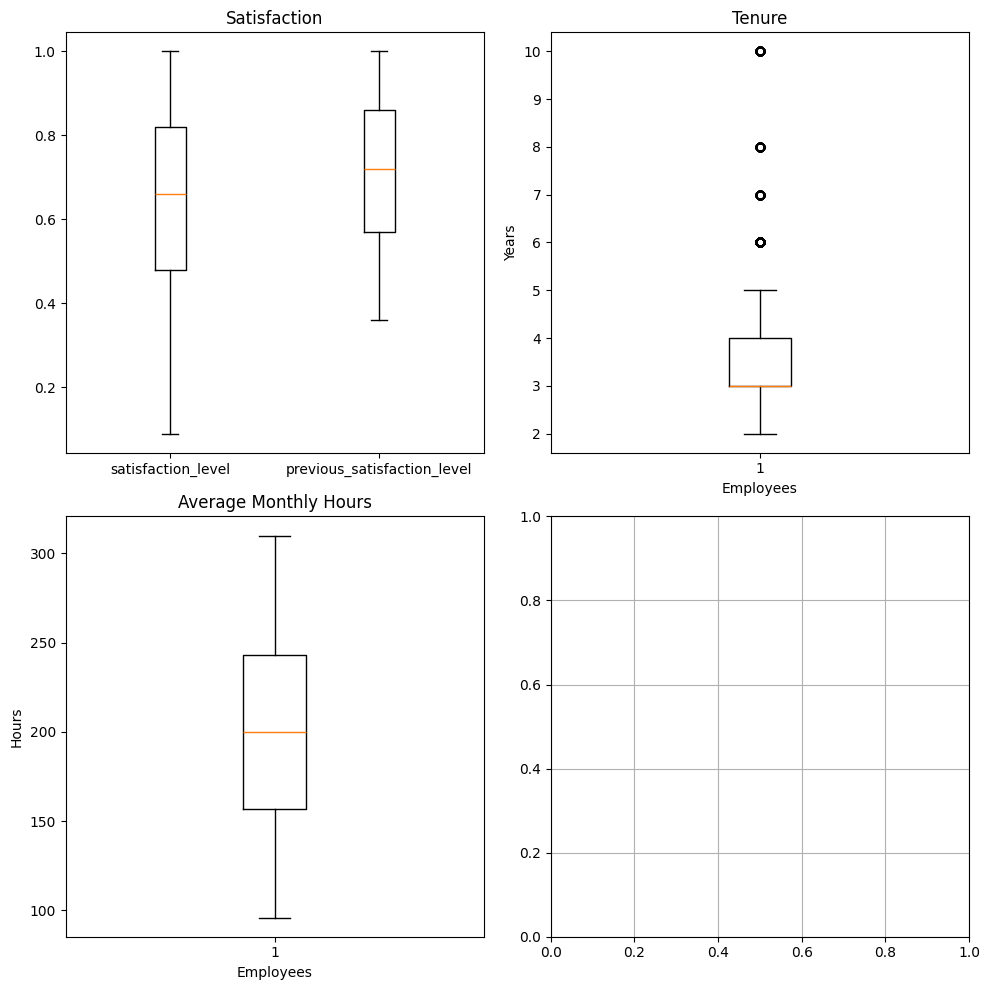

In [71]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers


satisfactions = df_cleaned[['satisfaction_level',
                        'previous_satisfaction_level']]
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes[0,0].boxplot([satisfactions[col] for col in satisfactions.columns], labels=satisfactions.columns)
axes[0,0].set_title('Satisfaction')

axes[0,1].boxplot(df_cleaned['tenure'])
axes[0,1].set_title('Tenure')
axes[0,1].set_ylabel('Years')
axes[0,1].set_xlabel("Employees")

axes[1,0].boxplot(df_cleaned['average_monthly_hours'])
axes[1,0].set_title('Average Monthly Hours')
axes[1,0].set_ylabel("Hours")
axes[1,0].set_xlabel("Employees")

save_path = os.path.join(OUTPUTS, 'Outliers.png')
plt.savefig(save_path)

plt.tight_layout()
plt.grid(True)
plt.show()


**Four Outliers observed** in Tenure boxplot. Investiagte further details about these outliers

Keep this information at hand when considering model construction

Sum of employees above 75th percentile in tenure: 4


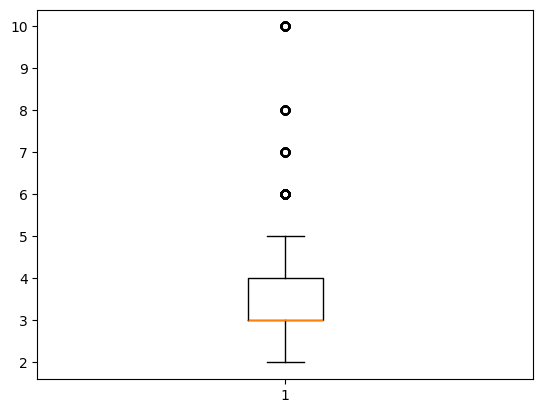

In [72]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###


tenure_plot = plt.boxplot(df_cleaned['tenure'])  # Visualise outliers from Tenure bloxplot
tenure_plot

q75 = df_cleaned['tenure'].quantile(0.75, interpolation='higher') # Extract value above 75th percentile

print(f"Sum of employees above 75th percentile in tenure: {q75}")




## pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)

Throughout the **Analyze Stage** of pace, I reflect upon the project goals, business scenario, and the provided questions below;

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage?
- Do you have any ethical considerations in this stage?

### Data Exploration (Continue EDA)


In [73]:
# Employees Left Vs Employees Stayed

retention_num = df_cleaned['left'].value_counts()
                 
print(f"Employee Rentention Number: \n{retention_num}\n")

# Percentages of Left Vs Stayed
    
retention_prt = np.round(retention_num / df_cleaned['left'].value_counts().sum(), decimals=4 )
      
print(f"Employee Rentention Percentages:\n{retention_prt}")


Employee Rentention Number: 
left
0    10000
1     1991
Name: count, dtype: int64

Employee Rentention Percentages:
left
0    0.834
1    0.166
Name: count, dtype: float64


#### Data visualizations

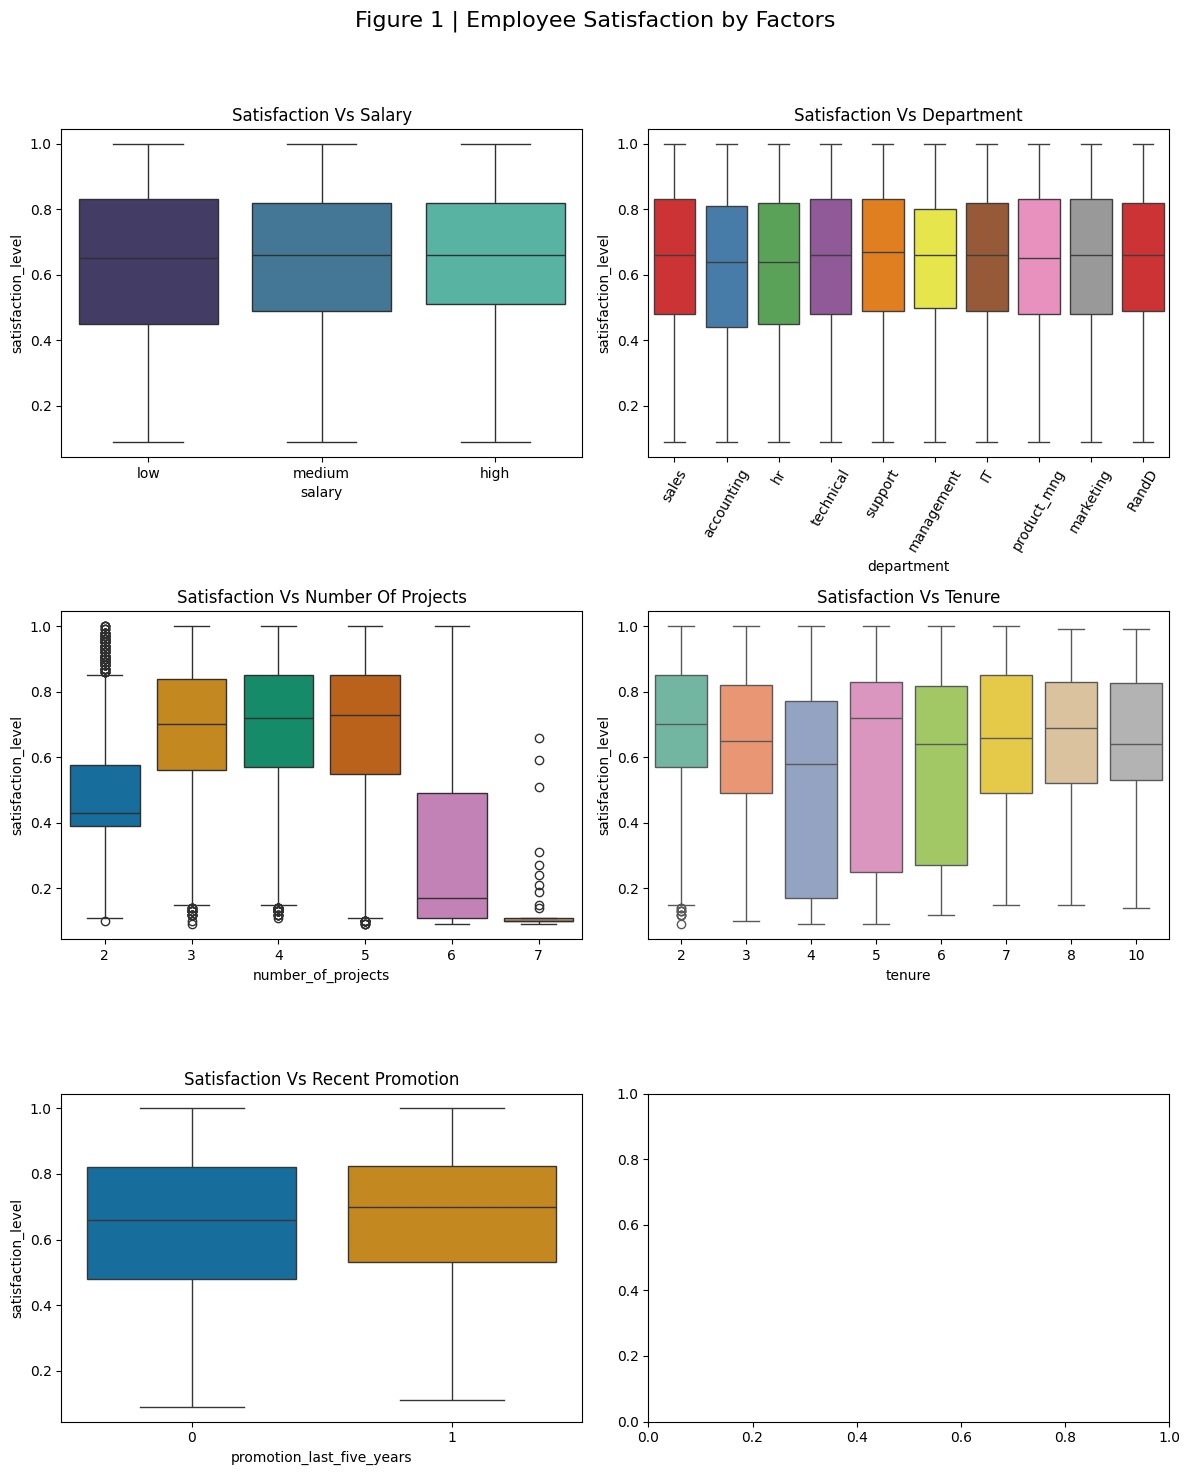

In [74]:
# Figure 1

# 3x2 Subplot
fig_1, ax = plt.subplots(3, 2, figsize=(12, 15))
fig_1.suptitle('Figure 1 | Employee Satisfaction by Factors', fontsize=16)

# Top-left
sns.boxplot(
    data=df_cleaned,
    x='salary',
    y='satisfaction_level',
    ax=ax[0, 0],
    hue = "salary",
    palette= 'mako',
    legend= None
   
)
ax[0,0].set_title('Satisfaction Vs Salary')

# Top-Right
sns.boxplot(
    data=df_cleaned,
    x='department',
    y='satisfaction_level',
    ax=ax[0, 1],
    hue = "department",
    palette = "Set1",
    legend= None
    
)
ax[0,1].set_title('Satisfaction Vs Department')
ax[0,1].tick_params(axis='x', labelrotation=60)

# Mid-Left
sns.boxplot(
    data=df_cleaned,
    x='number_of_projects',
    y='satisfaction_level',
    ax=ax[1, 0],
    hue = "number_of_projects",
    palette= 'colorblind',
    legend= None
)
ax[1,0].set_title('Satisfaction Vs Number Of Projects')


# Mid-Right
sns.boxplot(
    data=df_cleaned,
    x='tenure',
    y='satisfaction_level',
    ax=ax[1, 1],
    hue = "tenure",
    palette = "Set2",
    legend= None
)

ax[1,1].set_title('Satisfaction Vs Tenure')

# Bottom-Left
sns.boxplot(
    data=df_cleaned,
    x='promotion_last_five_years',
    y='satisfaction_level',
    ax=ax[2, 0],
    hue = "promotion_last_five_years",
    palette= 'colorblind',
    legend= None
)
ax[2,0].set_title('Satisfaction Vs Recent Promotion')


# Bottom-Right


# Save Fig
save_path = os.path.join(OUTPUTS, 'Figure_1_Employee_Satisfaction_by_Factors.png')
plt.savefig(save_path) 

# Display & Layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Figure 1 | Employee Satisfaction By Factors

Key Observations

- Satisfaction vs Salary (top-left)
    - Little to no systematic difference by salary band; distributions largely overlap.

- Satisfaction vs Department (top-right)
    - No clear department stands out; medians and IQRs are broadly similar across teams.

- Satisfaction vs Number of Projects (mid-left)
    - Clear drop in satisfaction once workload reaches 6–7 projects—very low medians and tight IQRs compared with 2–5 projects. 

- Satisfaction vs Tenure (mid-right)
    - Satisfaction appears lower around 4–6 years of tenure (lower medians/1st quartiles) relative to 2–3 and ≥7 years.

- Satisfaction vs Recent Promotion (bottom-left)
    - Those promoted in the last 5 years show higher satisfaction (higher median and upper quartile).


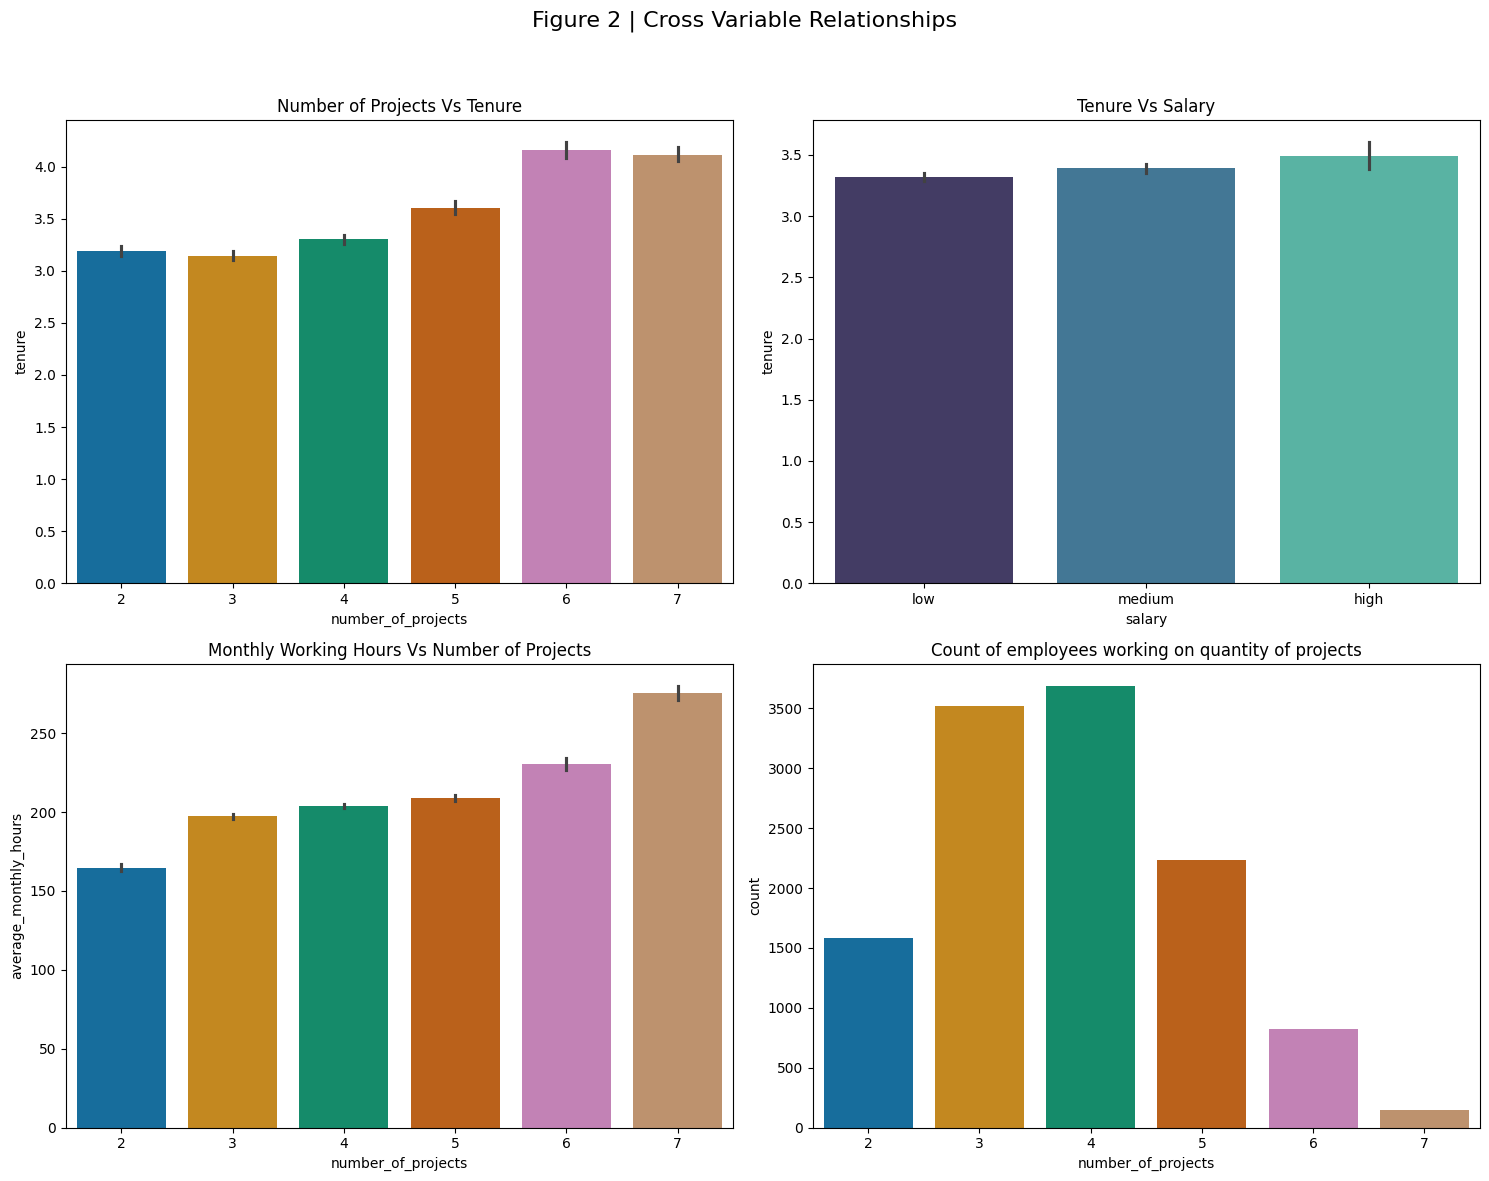

In [75]:
# Figure 2

# 2x2 Grid

fig_2, ax = plt.subplots(2,2, figsize=(15,12))
fig_2.suptitle('Figure 2 | Cross Variable Relationships', fontsize=16)


# Top-Left

sns.barplot(
    data=df_cleaned,
    x='number_of_projects',
    y='tenure',
    ax=ax[0,0],
    hue = "number_of_projects",
    palette= 'colorblind',
    legend= None
)
ax[0,0].set_title('Number of Projects Vs Tenure')

# Top-Right

sns.barplot(
        data=df_cleaned,
        x='salary',
        y='tenure',
        ax=ax[0,1],
        hue = "salary",
        palette= "mako",
        legend= None
           )
ax[0,1].set_title("Tenure Vs Salary")

# Bottom-Left

sns.barplot(
    data=df_cleaned,
    x='number_of_projects',
    y='average_monthly_hours',
    ax=ax[1,0],
    hue = "number_of_projects",
    palette= 'colorblind',
    legend= None
)
ax[1,0].set_title("Monthly Working Hours Vs Number of Projects")

# Bottom-Right

sns.countplot(
    data=df_cleaned,
    x='number_of_projects',
    ax=ax[1,1],
    hue = "number_of_projects",
    palette= 'colorblind',
    legend= None
)
ax[1,1].set_title("Count of employees working on quantity of projects")


# Save Fig
save_path = os.path.join(OUTPUTS, 'Figure_2_Cross_Variable_Relationships.png')
plt.savefig(save_path) 


# Display & Layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Figure 2 | Cross Variable Relationships

Key Observations

- Number of Projects vs Tenure (top-left)
    - Clear higher average tenure for employees assigned to 6 and 7 projects. General increase of tenure as increase project quantity increase

- Tenure vs Salary (top-right)
    - Anticpaited increase of salary observed with increase in tenure. No outstanding outliers.

- Average Monthly Hours vs Number of Projects
    - Clear increase in average working hours as increase of number of projects. Substainial rise for employees with 7 projects.

- Count of employees working on different number of projects
    - Right skewed distribution observarable, majority of employees assigned 3 or 4 projects. Extremely low number employees at 7 projects. 

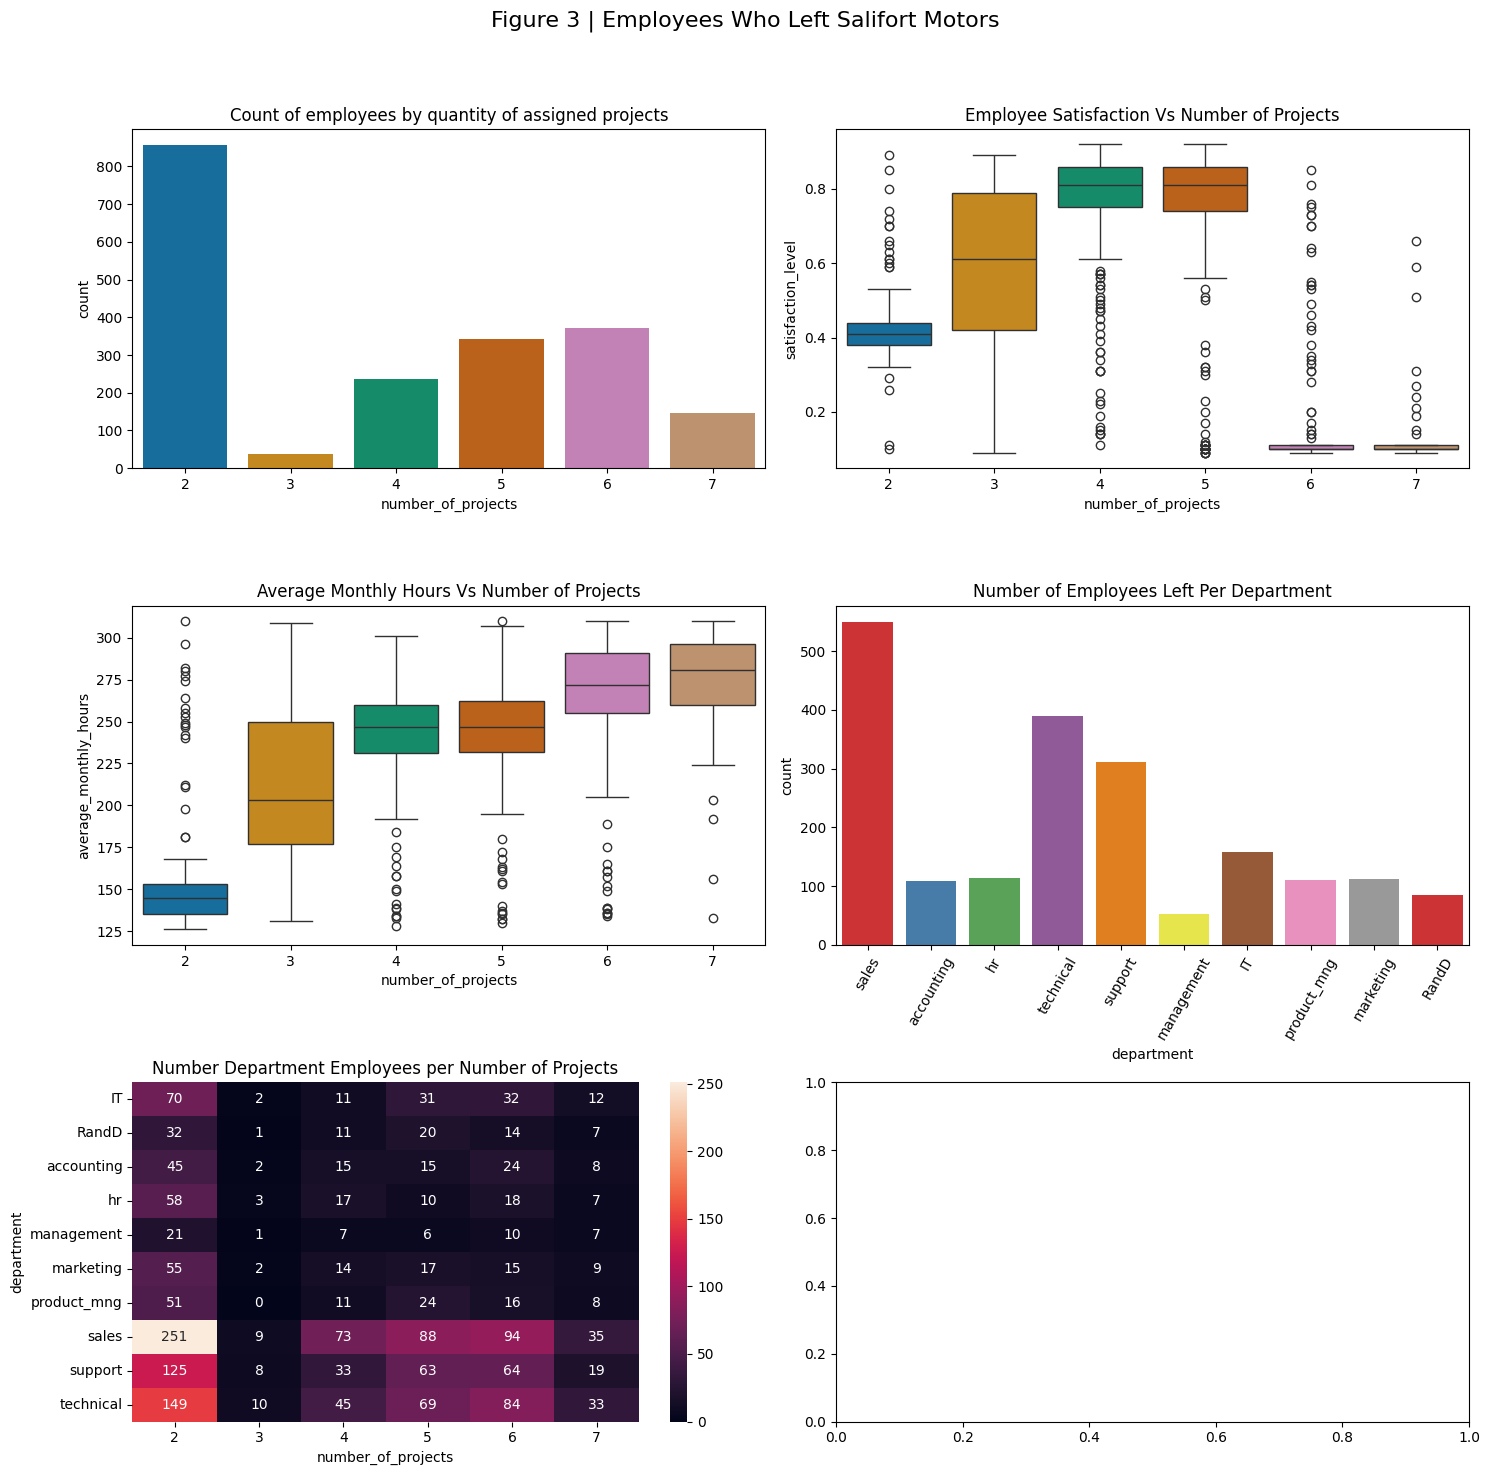

In [76]:
# Figure 3

# Identify only employees who left
emps_left = df_cleaned[df_cleaned['left']==1]

fig_3, ax = plt.subplots(3,2, figsize=(15,15))

fig_3.suptitle('Figure 3 | Employees Who Left Salifort Motors', fontsize=16)


# Top-Left

sns.countplot(
    data= emps_left,
    x='number_of_projects',
    ax=ax[0,0],
    hue = "number_of_projects",
    palette= 'colorblind',
    legend= None
)
ax[0,0].set_title('Count of employees by quantity of assigned projects')

# Top-Right

sns.boxplot(
    data = emps_left,
    x = 'number_of_projects',
    y = 'satisfaction_level',
    ax = ax[0,1],
    hue = "number_of_projects",
    palette= 'colorblind',
    legend= None
)
ax[0,1].set_title('Employee Satisfaction Vs Number of Projects')

# Mid-Left
sns.boxplot(
    data = emps_left,
    x = 'number_of_projects',
    y = 'average_monthly_hours',
    ax = ax[1,0],
    hue = "number_of_projects",
    palette= 'colorblind',
    legend= None
)
ax[1,0].set_title('Average Monthly Hours Vs Number of Projects')

# Mid-Right
sns.countplot(
    data = emps_left,
    x='department',
    ax = ax[1,1],
    hue = "department",
    palette= 'Set1',
    legend= None
    
)
ax[1,1].set_title('Number of Employees Left Per Department')
ax[1,1].tick_params(axis='x', labelrotation=60)

# Bottom-Left

dept_proj_counts = pd.crosstab(
    emps_left['department'],
    emps_left['number_of_projects']
)
sns.heatmap(
    data = dept_proj_counts,
    annot = True,
    fmt='d',  
    ax = ax[2,0]
)
ax[2,0].set_title('Number Department Employees per Number of Projects')

# Bottom-Right

# Save Fig
save_path = os.path.join(OUTPUTS,'Figure_3_Employees_Who_Left_Salifort_Motors.png')
plt.savefig(save_path)

# Display & Layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Figure 3 | Employees Who Left Salifort Motors

Key Observations

- Count of Employees by Number of Assigned Projects (top-left)
    - Substantial number of employees assigned to 2 projects
    - Moderate quantities assigned to 5 or 6 projects.
    - Further beneficial analysis to observe attrition rates of employees who left vs total employees per number of projects

- Employee Satisfaction vs Number of Assigned Projects (top-right)
    - Observations support previous visualisations. Very employee low satisfaction when assigned to large project quantities (6 or 7)
    - Moderately low satisfaction of employees assigned to 2 projects 

- Average Monthly Hours vs Number of Assigned Projects
    - Observations support previous visualisations. Employees assigned to 6 or 7 projets work increasingly large monthy hours, >250
    - Story beginning to unravel, association of low satisfaction among employees who left with high quantity of average working hours and number of projects

- Number of employees who left by Department
    - Very high quantities across Sales, Tech and Support department.
    - Missing information regarding type of departure. Observations show unknown possibilies of layoffs in these departments, compared to departure from employee decisions.

- Number of Department Employees per Number of Projects
    - Observations show large quantities of employees assigned to less projects in departments Sales, Support, Technical.
    - Potential story unravelling of layoffs across these departments. Further analysis possible to discover department satisfaction levels 

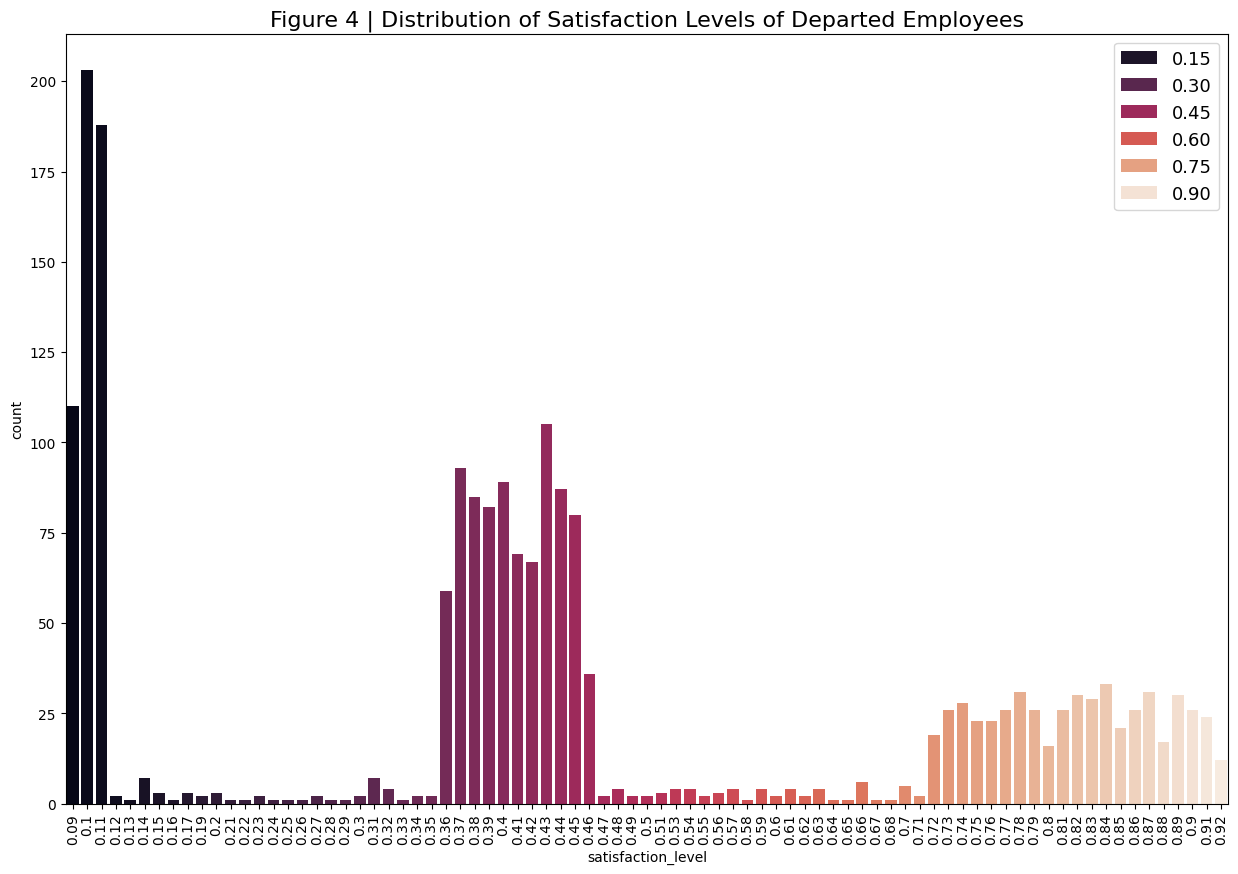

In [77]:
# Figure 4


fig_4, ax = plt.subplots(1,1,figsize=(15,10))
                    
sns.countplot(
    data = emps_left,
    x='satisfaction_level',
    hue = "satisfaction_level",
    palette= 'rocket',
    legend= True
)
ax.tick_params(axis='x',labelrotation=90)
ax.set_title('Figure 4 | Distribution of Satisfaction Levels of Departed Employees', fontsize=16)
ax.legend(fontsize=13)

# Save Fig
save_path = os.path.join(OUTPUTS,'Figure_4_Distribution_of_Satisfaction_Levels_of_Departed_Employees.png')
plt.savefig(save_path)


# Display & Layout
# plt.tight_layout()


#### Figure 4 | Distribution of Satisfaction Levels of Departed Employees

Key Observations

- Three clear clusters of satisfaction levels.
    - Low Satisfaction: x <=0.12
    - Mid Satisfaction: 0.31 <= x <= 0.48
    - High Satisfaction: 0.70 <= x
- Further possible analysis to identify trends within each cluster 

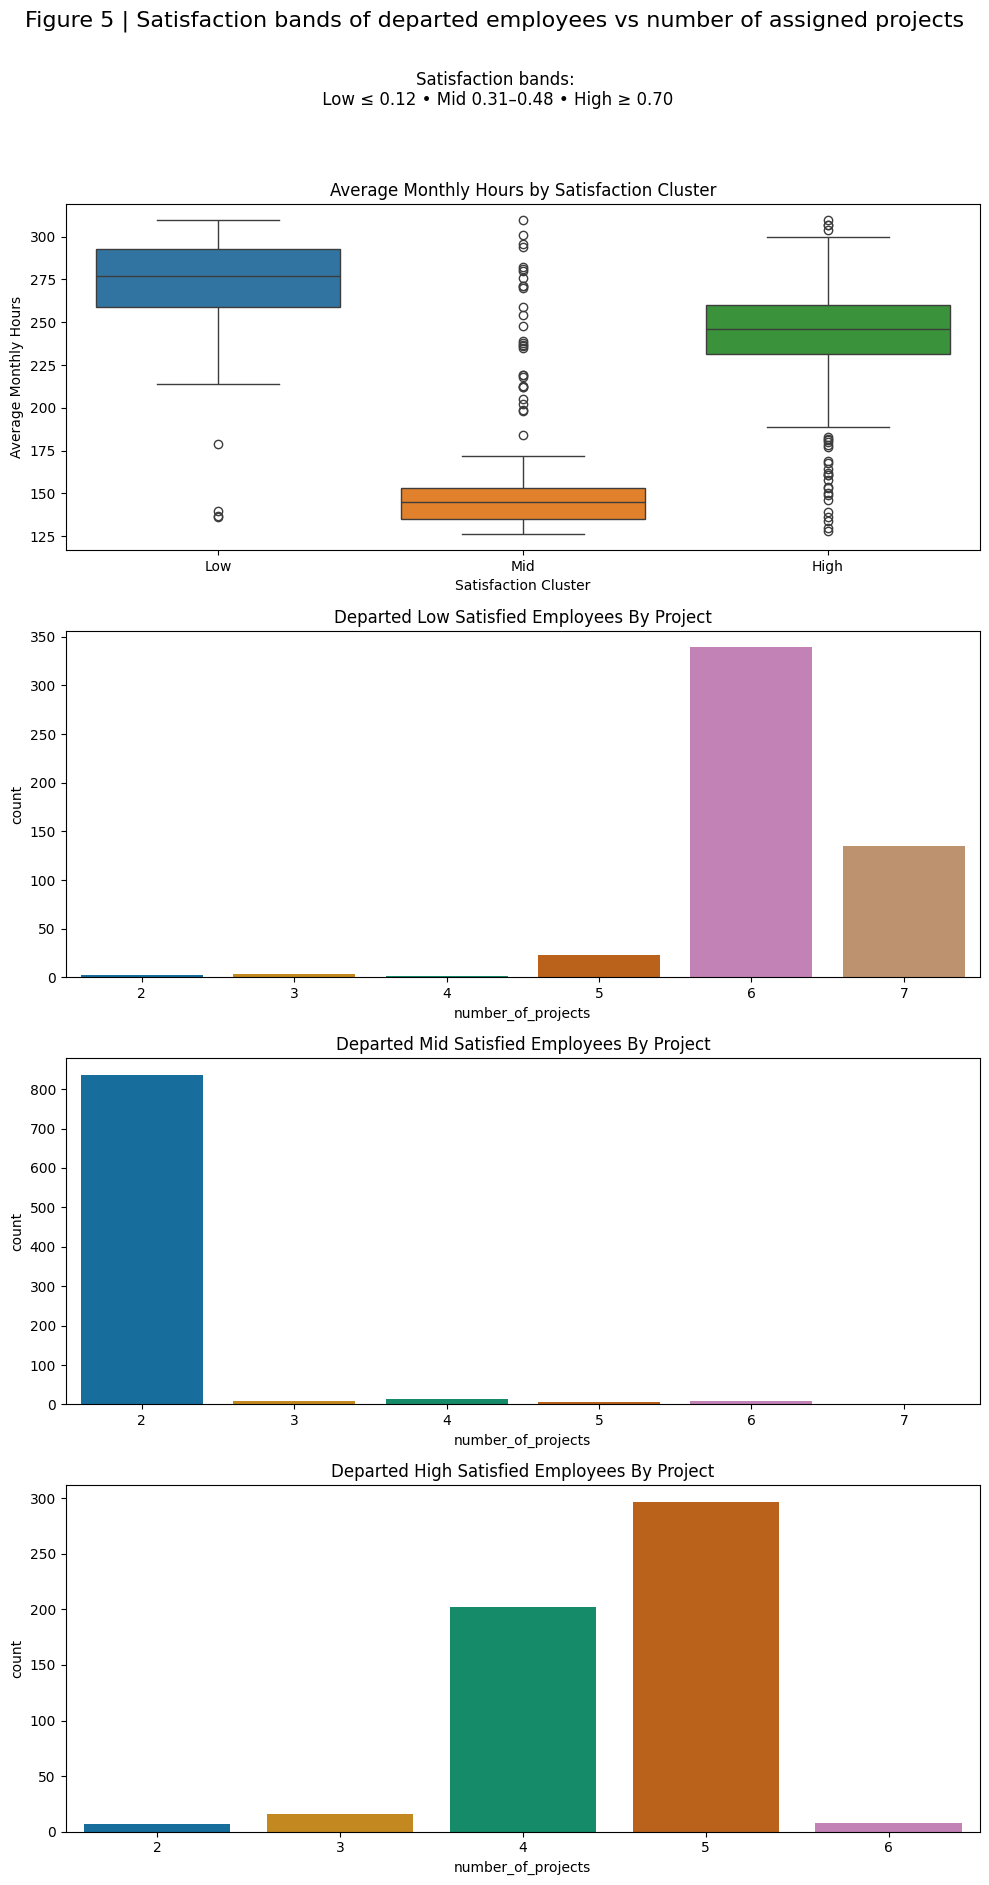

In [159]:
# Figure 5



# Build 2x2 grid
fig_5, ax = plt.subplots(4, 1, figsize=(10, 20))
fig_5.suptitle(
    "Figure 5 | Satisfaction bands of departed employees vs number of assigned projects",
    fontsize=16
)

cluster_sat = emps_left.copy()

low  = cluster_sat["satisfaction_level"] <= 0.12
mid  = cluster_sat["satisfaction_level"].between(0.31, 0.48, inclusive="both")
high = cluster_sat["satisfaction_level"] >= 0.70

cluster_sat["Satisfaction Cluster"] = np.select(
    [low, mid, high],
    ["Low", "Mid", "High"],
    default="Other"  # or "Other" if you prefer to label the gaps
)

# make it an ordered categorical so plots come out in a nice order
cluster_sat["Satisfaction Cluster"] = pd.Categorical(
    cluster_sat["Satisfaction Cluster"],
    categories=["Low", "Mid", "High"],
    ordered=True
)


# First
sns.boxplot(
    data=cluster_sat.dropna(subset=["Satisfaction Cluster"]),
    x="Satisfaction Cluster",      # Low / Mid / High
    y="average_monthly_hours",
    order=["Low", "Mid", "High"],
    ax=ax[0],
    hue='Satisfaction Cluster'
)

ax[0].set_title("Average Monthly Hours by Satisfaction Cluster")
ax[0].set_xlabel("Satisfaction Cluster")
ax[0].set_ylabel("Average Monthly Hours")

# Differentiate employees by satisfaction levels

low_sat = emps_left[emps_left['satisfaction_level']<=0.12]
mid_sat = emps_left[
    (emps_left['satisfaction_level'] >= 0.31) &
    (emps_left['satisfaction_level'] <= 0.48)]

high_sat = emps_left[emps_left['satisfaction_level']>=0.7]

# Second
sns.countplot(
    data = low_sat,
    x = 'number_of_projects',
    ax=ax[1],
    hue = "number_of_projects",
    palette= 'colorblind',
    legend= None
)
ax[1].set_title('Departed Low Satisfied Employees By Project')

# Third
sns.countplot(
    data = mid_sat,
    x = 'number_of_projects',
    ax = ax[2],
    hue = "number_of_projects",
    palette= 'colorblind',
    legend= None
)
ax[2].set_title('Departed Mid Satisfied Employees By Project')


# Fourth
sns.countplot(
    data = high_sat,
    x = 'number_of_projects',
    ax = ax[3],
    hue = "number_of_projects",
    palette= 'colorblind',
    legend= None
)
ax[3].set_title('Departed High Satisfied Employees By Project')


# Save Fig
save_path = os.path.join(OUTPUTS,'Figure_5_Satisfaction_Bands_of_Departed_Employees_vs_Number_of_Assigned_Project.png')
plt.savefig(save_path)

# Display & Layout
band_note = "Satisfaction bands:\n Low ≤ 0.12 • Mid 0.31–0.48 • High ≥ 0.70"
fig_5.text(0.5, 0.94, band_note, ha="center", va="center", fontsize=12)
fig_5.subplots_adjust(left=0.10, right=0.98, bottom=0.08, top=0.95, hspace=0.38)
plt.tight_layout(rect=[0, 0.04, 1, 0.92])

#### Figure 5 | Satisfaction Bands of Departed Employees & Number of Assigned Projects

Key observations

- Average Monthly Hours by Satisfaction Cluster
    - Departed employees within the low satisfaction cluster were associated with the highest average monthly hours
        - Low cluster 1st quartile slight overlap with 3rd quartile from high cluster
        - Three outliers compared to numerous in clusters Mid and High

- Departed Low Satisfied Employees By Project
    - From Low Satisfied cluster of departed employees, observations show very large associations with 6 or 7 projects 

- Departed Mid Satisfied Employees By Project
    - Mid Satisfied cluster employees overwhelming associated with 2 projects

- Departed High Satisfied Employees By Project
    - High Satisfied cluster employees spread across 4 or 5 projects.

### Insights

Employee satisfaction level has visible associations with the **number of projects**; strong association with assignment to **6 and 7 different projects** and moderate association with assignment to **2 different projects.** Additional factor **tenure** has moderate associations with employee satisfaction level for duration of **3 and 4 years**.

Further investigation found that **employees assigned to 6 or 7 different projects host an average tenure of around 4 years**, compared to other project quantities with tenures of lower duration. This **matches the substantiality smaller quantity of employees assigned to 6 or 7 differents projects, who also experience much higher average monthly hours**.

Visualistions on employees who **left** the Salfort Motors organisations found **extremely low satifcation levels for employees on 6 or 7 differnt projects**, followed by 2 projects which had a substainlity high quantity of departed employees. 

Finally, after assessing the quantity of departed employees by project, there are three identifable clusters of employee satisfaction levels for which we have grouped for further analysis:
- Low Satisfaction Cluster (x <= 0.12)
- Mid Satisfaction Cluster (0.31 <= x <= 0.48)
- High Satisfaction Cluster (0.70 <= x)

Within these clusters, we see that the majority of all **Low Satisfaction Level Employees who departed** were on **6 or 7 projects**. Mid Satisfaction Level employees who departed were primarly assigned to 2 projects. High Satisfaction level employees who departed were primarly assign to 4 or 5 projects.


While the data does not differentiate between employees who left voluntarily  and those who were fired or made redunant, initial inference from the visualistions suggests there are three key distinctive clusters of employees with varying influencing factors. Inference from these visualisations show departed employees with **low levels of satisfaction** were assigned to **6 or 7 projects**. The majority of whom are employees with **4 years of tenure, working higher average monthly hours** at Salifort Motors. This cluster of departed employees will become the focal point of the remaining analysis to investiage retention rates of employees.



## paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data

As I proceed with the **Construct Stage** of the PACE model, I reflect upon the project goals, task at hand from data acquired and the provided questions below;

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage?
- Do you have any ethical considerations in this stage?



### Model Building

Referring to the project aim, we are tasked to identify the key factors that influence employees leaving Salifort. To proceed with producing a model, we shall focus on **classification prediction** of employeees who left Salifort from numerous predictor variables, to then identify the strongest influences.

Classifciation models;

- Clear baseline model
    - Logistic Regression
- Descriptive precise metrics
    - XGBoost

No visible relationships between independent factors. Content to proceed with all variables available.


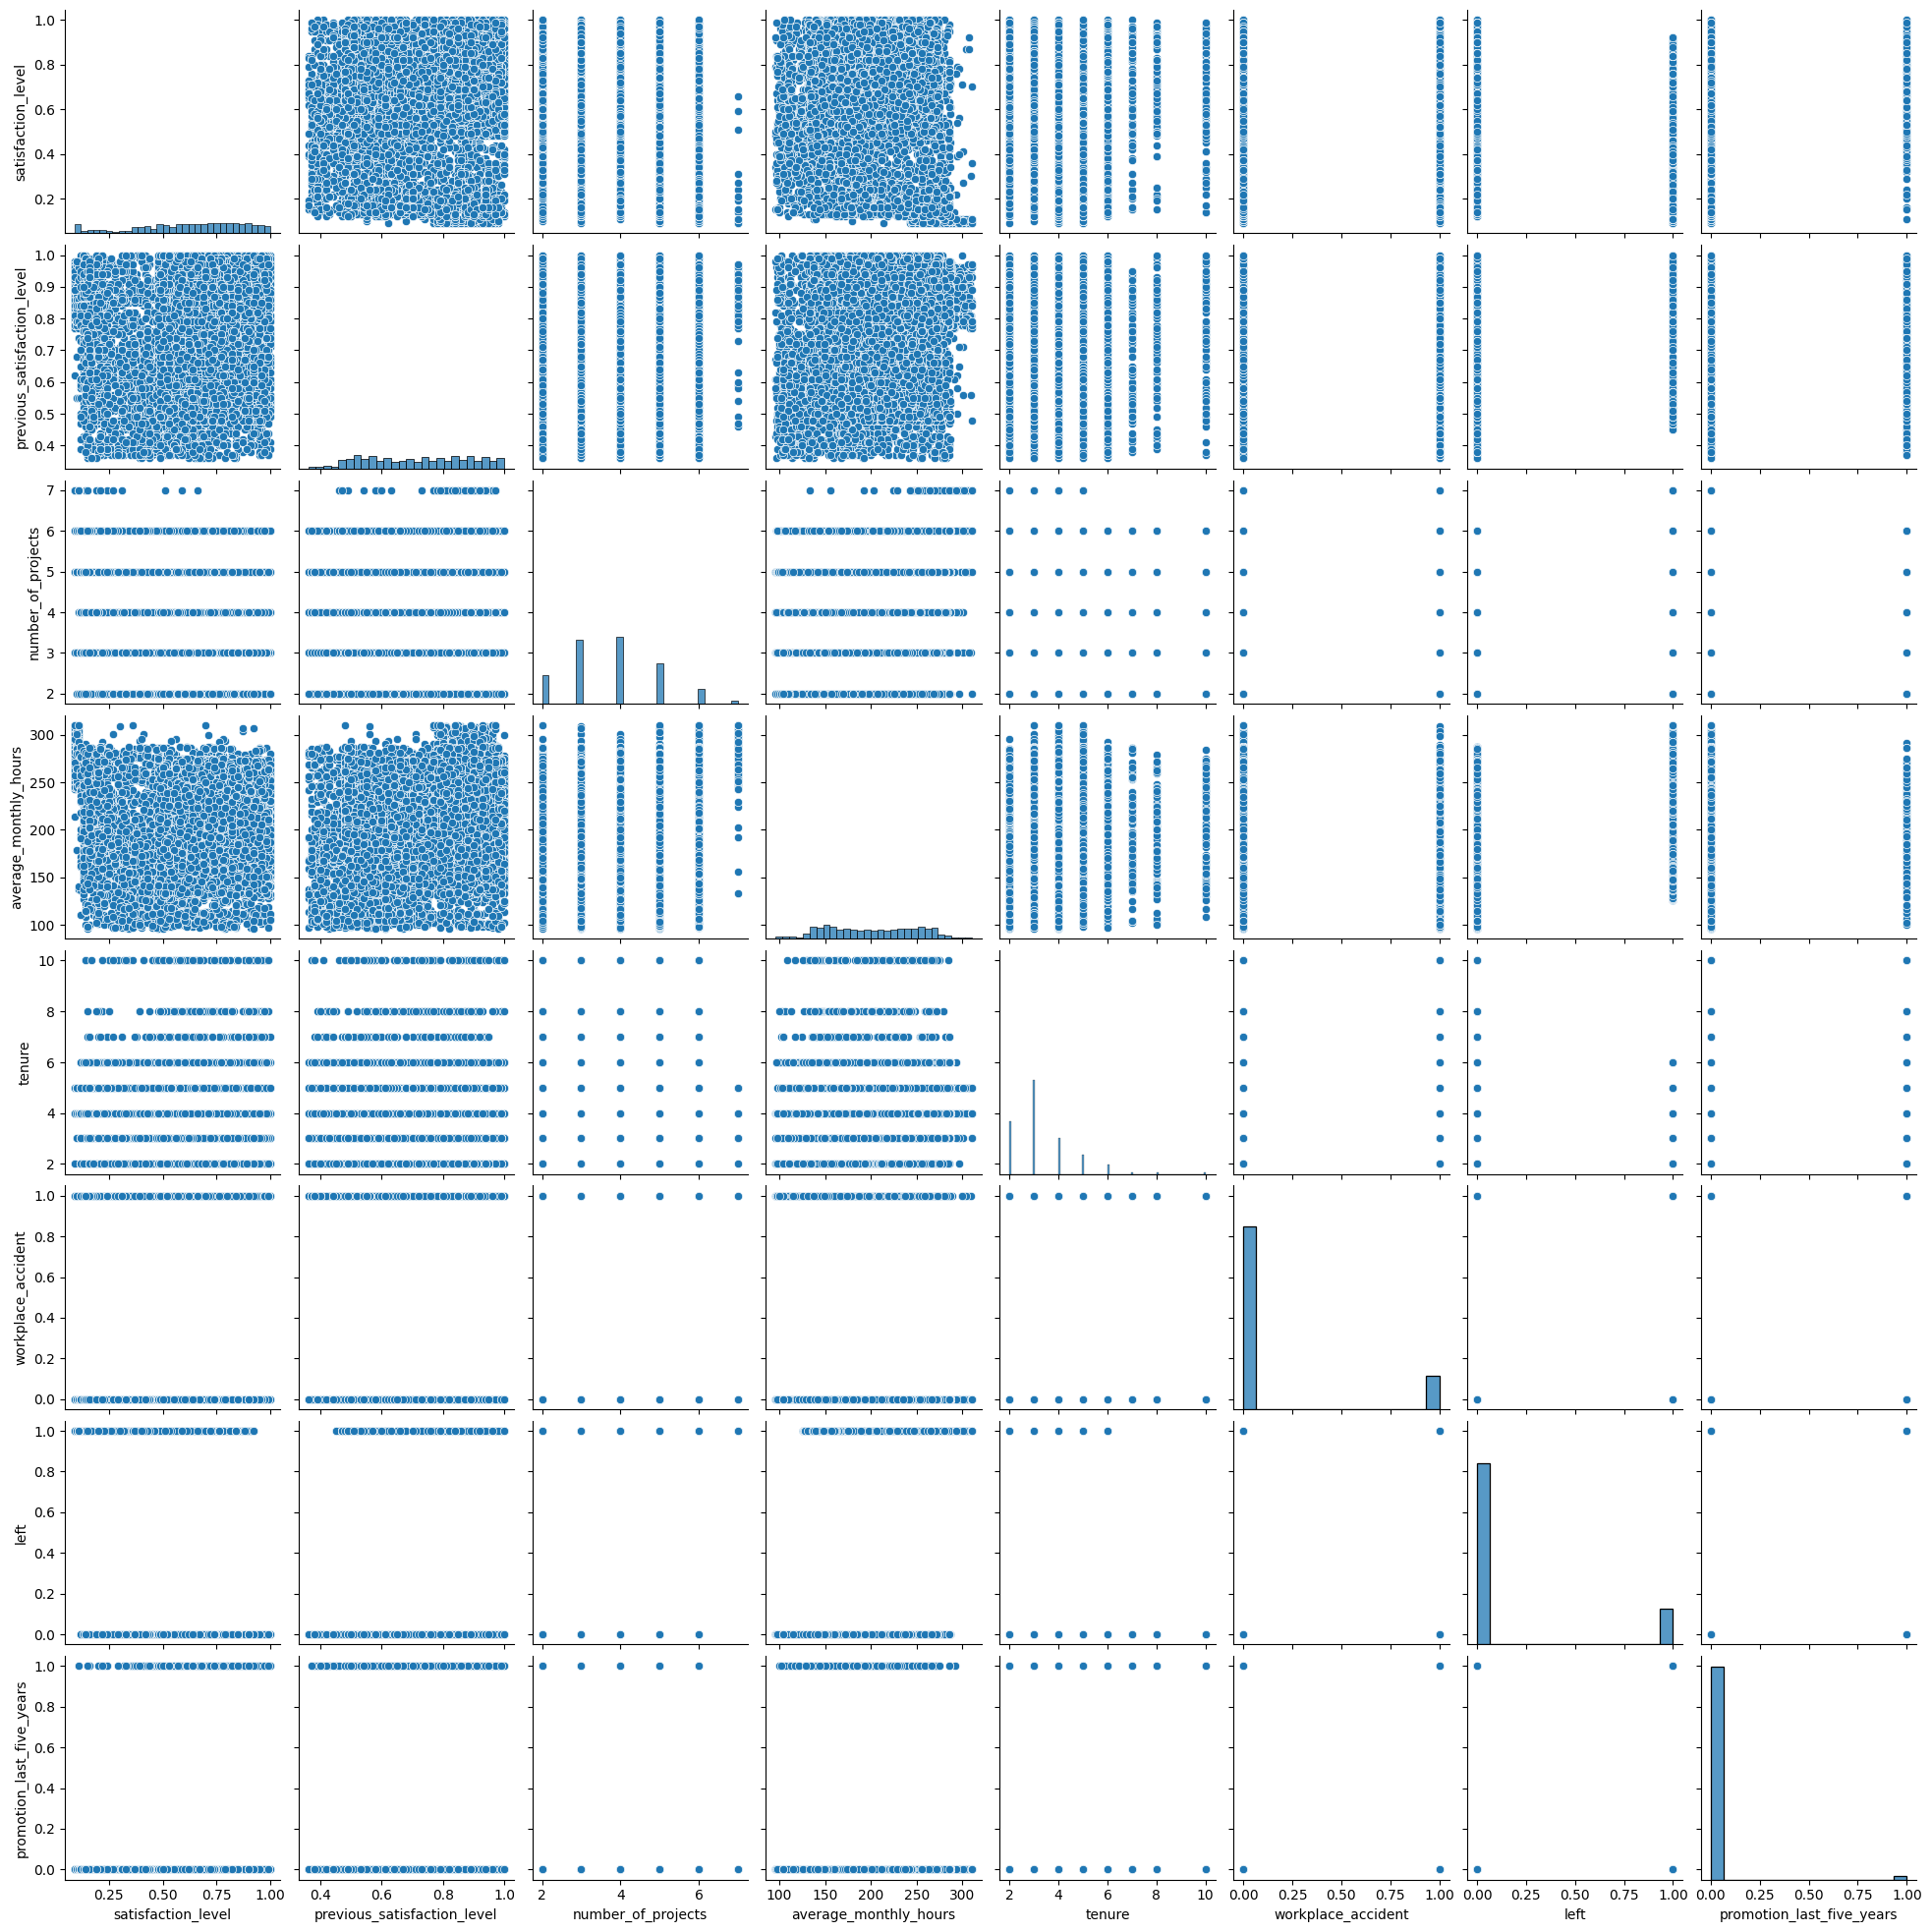

In [79]:
sns.pairplot(df_cleaned)

print('No visible relationships between independent factors. Content to proceed with all variables available.')

#### Feature Engineering

In [80]:
# Feature Engineering

## Projects


df_dummied = df_cleaned.copy()



## Dummies Variables
df_dummied = pd.get_dummies(df_dummied, drop_first=True)

### Departments
depts = sorted(df_cleaned['department'].unique())
print("All department levels:\n", depts,"\n")

dummy_cols = [c for c in df_dummied.columns if c.startswith('department_')]
print("Dummy columns:\n", dummy_cols,"\n")

baseline = set(depts) - set(col.split('department_')[1] for col in dummy_cols)
print("Baseline department:\n", baseline,"\n")

### Salary
saly = sorted(df_cleaned['salary'].unique())
print("All Salary Levels:\n", saly,"\n")

sal_dummy_cols = [c for c in df_dummied.columns if c.startswith('salary')]
print("Salary Dummy columns:\n", sal_dummy_cols,"\n")

sal_baseline = set(saly) - set(col.split('salary_')[1] for col in sal_dummy_cols)
print("Baseline Salary:\n", sal_baseline,"\n")




All department levels:
 ['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical'] 

Dummy columns:
 ['department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical'] 

Baseline department:
 {'IT'} 

All Salary Levels:
 ['high', 'low', 'medium'] 

Salary Dummy columns:
 ['salary_low', 'salary_medium'] 

Baseline Salary:
 {'high'} 



In [81]:
print(f''' 
Imbalanced target variable of Employees 'Left'

Counts:
{df_dummied['left'].value_counts()}

Percentage:
{df_dummied['left'].value_counts(normalize=True)}

Stratify target y-variable during split
''')

 
Imbalanced target variable of Employees 'Left'

Counts:
left
0    10000
1     1991
Name: count, dtype: int64

Percentage:
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

Stratify target y-variable during split



In [82]:
# Variables
dropped_variables = [
    'left',
    'workplace_accident',
    'salary_low',
    'salary_medium',
    
]
X = df_dummied.drop(dropped_variables, axis=1)
y = df_dummied['left']

# Hold-out Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0,stratify=y)

#### Logistics Regression Model

In [83]:
# Create model
clf_model = LogisticRegression(solver='liblinear',random_state=0)

clf_model.fit(X_train,y_train)

# Make predictions
y_pred = clf_model.predict(X_test)

In [84]:
# Build a table of coefficients
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coef": clf_model.coef_[0]       # row 0 because binary classification
})

# Add odds ratios (exp of coefficient)
coef_df["odds_ratio"] = np.exp(coef_df["coef"])

# Sort by size of effect (absolute value)
coef_df = coef_df.reindex(
    coef_df["coef"].abs().sort_values(ascending=False).index
)
# Scale satsifaction level

coef_df["coef_scaled"] = coef_df["coef"]          # copy
coef_df["odds_ratio_scaled"] = coef_df["odds_ratio"]

# scale the satisfaction coefficient to a 0.1 step
steps = {
    "satisfaction_level": 0.1,
    "previous_satisfaction_level": 0.1,
}

mask = coef_df["feature"].isin(steps.keys())

coef_df.loc[mask, "coef_scaled"] = (
    coef_df.loc[mask, "coef"] * coef_df.loc[mask, "feature"].map(steps)
)

# recompute odds ratio for that scaled coef
coef_df.loc[mask, "odds_ratio_scaled"] = np.exp(coef_df.loc[mask, "coef_scaled"])

coef_df




,feature,coef,odds_ratio,coef_scaled,odds_ratio_scaled
0,satisfaction_level,-3.894944,0.020345,-0.389494,0.677399
5,promotion_last_five_years,-1.084653,0.338019,-1.084653,0.338019
9,department_management,-0.525879,0.591036,-0.525879,0.591036
1,previous_satisfaction_level,0.485424,1.624864,0.048542,1.049740
6,department_RandD,-0.313754,0.730699,-0.313754,0.730699
2,number_of_projects,-0.268904,0.764217,-0.268904,0.764217
4,tenure,0.266429,1.305294,0.266429,1.305294
10,department_marketing,0.081357,1.084758,0.081357,1.084758
14,department_technical,0.059382,1.061180,0.059382,1.061180
13,department_support,0.056360,1.057978,0.056360,1.057978


##### Results
Number of Projects:

- Each additional project adds to an employee's workload is associated with ≈24% lower odds of leaving
    - Contradictory to visualisations and anticiapted relationship. Further analysis of distinguishing employee departure **voluntarily / forced** may bring to light further information.

Satisfaction & tenure:

- Satisfaction level increase of 0.1 is associated with ≈33% lower odds of leaving
- Each additional year of tenure is associated with ≈30% higher odds of leaving

Promotion: 

- A promotion in the last five years reduces the odds of leaving by roughly ≈76%.


In [85]:
acc_scr = accuracy_score(y_test,y_pred)
prec_scr = precision_score(y_test,y_pred)
rec_scr = recall_score(y_test,y_pred)
f_scr = f1_score(y_test,y_pred)

model_score = pd.DataFrame( {
    'Model':['Logistic Regression'],
    'Precision':[prec_scr],
    'Recall':[rec_scr],
    'F1':[f_scr],
    'Accuracy':[acc_scr]
}
)
model_score

,Model,Precision,Recall,F1,Accuracy
0,Logistic Regression,0.468421,0.178715,0.258721,0.829887


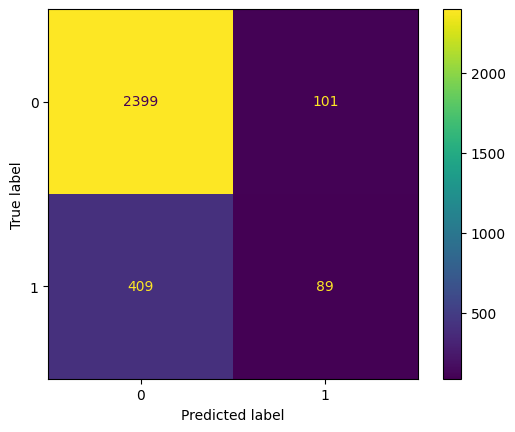

In [86]:
LG_matrix = confusion_matrix(y_test, y_pred, labels = clf_model.classes_)

LG_display = ConfusionMatrixDisplay(confusion_matrix=LG_matrix,display_labels=clf_model.classes_)

LG_display.plot(values_format='d')

#### XGBoost Model

In [87]:
# XGBoost Model

## Instigate model
xgboost = XGBClassifier(objective='binary:logistic', random_state=0)

## Define CrossValidation Parameters

cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scoring = ['accuracy', 'precision', 'recall', 'f1']

## Construct GridSearch for optimal parameters
xgb_cv = GridSearchCV(xgboost,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

In [88]:
# %time
# # fit the GridSearch model to training data

# xgb_cv = xgb_cv.fit(X_train, y_train)
# xgb_cv

In [89]:
# # Pickle the Model


# with open(str(model_paths) +'/xgb_cv_model.pickle', 'wb') as to_write:
#     pickle.dump(xgb_cv, to_write) 

In [90]:
# Open pickled model

with open(str(model_paths)+'/xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

##### Results

In [91]:
# Identify the best hyperparameters (params) that produced the best refit score for 'f1'
print(xgb_cv.best_params_)

# XGBoost Model with optimal parameters from GridSearch
best_xgb = xgb_cv.best_estimator_ 



{'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 15, 'subsample': 0.7}


File 'xgb_importance_gain.png' moved successfully from '/Users/mitchellpalmer/Projects/Salifort-Motors/notebooks' to '/Users/mitchellpalmer/Projects/Salifort-Motors/Outputs'.


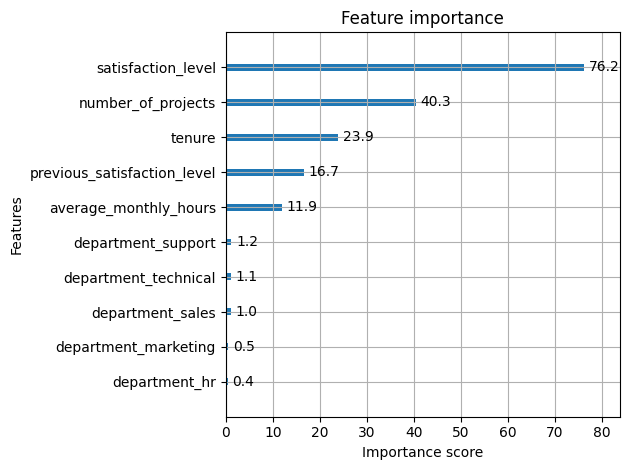

In [92]:
# Check XGBoost Model valuations of best variable predictors

# Use 'Gain' to assess importance by drop in 'Loss' or 'Log-Loss' 
XGB_Feature_Importance = plot_importance(best_xgb, importance_type='gain', show_values=True)


# round every text label to 1 decimal
for t in XGB_Feature_Importance.texts:
    t.set_text(f"{float(t.get_text()):.1f}")

XGB_Feature_Importance.figure.tight_layout()

# Save & Export 
XGB_Feature_Importance.figure.savefig("xgb_importance_gain.png", dpi=200, bbox_inches="tight")
file_name = "xgb_importance_gain.png"

# Construct the full paths for the source file and destination
source_file_path = os.path.join(nb_directory, file_name)
destination_file_path = os.path.join(output_directory, file_name)

try:
    # Move the file
    shutil.move(source_file_path, destination_file_path)
    print(f"File '{file_name}' moved successfully from '{nb_directory}' to '{output_directory}'.")
except FileNotFoundError:
    print(f"Error: Source file '{source_file_path}' not found.")
except PermissionError:
    print(f"Error: Permission denied to move '{file_name}'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Figure to display
XGB_Feature_Importance = XGB_Feature_Importance.figure

#### Evaluation

In [93]:
# Make predictions on the test set
xgb_y_pred = best_xgb.predict(X_test)


#XGBoost Metrics
xgb_prec_scr = precision_score(y_test,xgb_y_pred)
xgb_rec_scr = recall_score(y_test, xgb_y_pred)
xgb_acc_scr = accuracy_score(y_test, xgb_y_pred)
xgb_f_scr = f1_score(y_test,xgb_y_pred)

# Model Score Metric Row
xgb_metric_row = pd.DataFrame([{
    'Model':'XGBoost',
    'Precision':xgb_prec_scr,
    'Recall':xgb_rec_scr,
    'F1':xgb_f_scr,
    'Accuracy':xgb_acc_scr
}])

# Append XGBoost Model Score to Dataframe
model_score = pd.concat([model_score, xgb_metric_row], ignore_index=True)

# Save and export
model_score.to_csv(str(OUTPUTS) + '/model_prediction_metrics.csv', index=False)
# View Model Scores
model_score

,Model,Precision,Recall,F1,Accuracy
0,Logistic Regression,0.468421,0.178715,0.258721,0.829887
1,XGBoost,0.982571,0.905622,0.942529,0.981654


In [94]:
# Export Model Metrics
dfi.export(model_score,"model_prediction_metrics.png",table_conversion="matplotlib")

# Define the source
file_name = "model_prediction_metrics.png"

# Construct the full paths for the source file and destination
source_file_path = os.path.join(nb_directory, file_name)
destination_file_path = os.path.join(output_directory, file_name)

try:
    # Move the file
    shutil.move(source_file_path, destination_file_path)
    print(f"File '{file_name}' moved successfully from '{nb_directory}' to '{output_directory}'.")
except FileNotFoundError:
    print(f"Error: Source file '{source_file_path}' not found.")
except PermissionError:
    print(f"Error: Permission denied to move '{file_name}'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

File 'model_prediction_metrics.png' moved successfully from '/Users/mitchellpalmer/Projects/Salifort-Motors/notebooks' to '/Users/mitchellpalmer/Projects/Salifort-Motors/Outputs'.


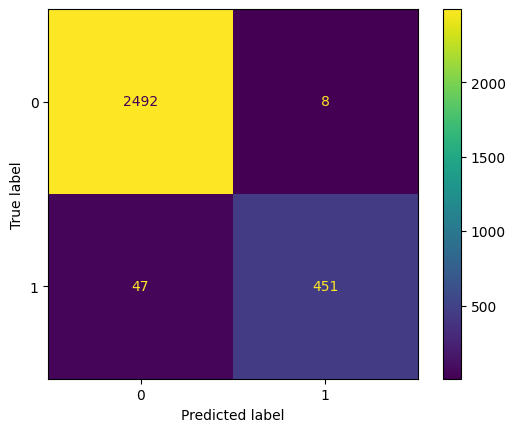

In [95]:
XGB_matrix = confusion_matrix(y_test, xgb_y_pred, labels = best_xgb.classes_)

XGB_display = ConfusionMatrixDisplay(confusion_matrix=XGB_matrix,display_labels=best_xgb.classes_)

XGB_display.plot(values_format='d')

## pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

As I proceed with the Execute Stage of the PACE model framework, I reflect upon the project aim and the following questions'

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage?
- Do you have any ethical considerations in this stage?


### Further Results & Evaluation

In [96]:
feature_imp = best_xgb.get_booster().get_score(importance_type='gain')
feature_imp_df = (pd.Series(feature_imp, name='gain').astype(float)
            .rename_axis('feature').reset_index())
feature_imp_df['gain_pct'] = 100 * feature_imp_df['gain'] / feature_imp_df['gain'].sum()

feature_imp_df

,feature,gain,gain_pct
0,satisfaction_level,76.173820,43.964162
1,previous_satisfaction_level,16.669491,9.620893
2,number_of_projects,40.345432,23.285600
3,average_monthly_hours,11.881622,6.857547
4,tenure,23.944008,13.819423
5,department_hr,0.448309,0.258744
6,department_marketing,0.490027,0.282822
7,department_sales,1.013700,0.585063
8,department_support,1.159436,0.669175
9,department_technical,1.137596,0.656570


### Summary of model results

Using both Logistic Regression and XGBoost gave two complementary views to assess variable influence employee retention at Salifort Motors. Logistic Regression for interpretable coefficients, and XGBoost for high-performance prediction and feature importance. 

#### Model Interpretations
- Logistic Regression
    - Number of Projects:
        - Each additional project adds to an employee's workload is associated with ≈24% lower odds of leaving
            - Contradictory to visualisations and anticiapted relationship. Further analysis of distinguishing employee departure **voluntarily / forced** may bring to light further information.

    - Satisfaction & tenure:

        - Satisfaction level increase of 0.1 is associated with ≈33% lower odds of leaving
        - Each additional year of tenure is associated with ≈30% higher odds of leaving

    - Promotion: 

        - A promotion in the last five years reduces the odds of leaving by roughly ≈76%.
        
The Logistic Regression model suggests increasing the number of projects an employee is assigned to decreases the odds of departure. However, this is in contradiction with visualisations, supporting that higher quantities of projects is associated with increase average monthly hours and a decrease in Satisfaction Levels.
Futher analysis in a more robust XGBoost model was required to assess the Number Of Projects variable.

Logistic Regression did support observations that increased Satisfaction Levels are associated with employee retention, and longer tenured employees are associated with higher odds of leaving. 

##### XGBoost Feature Importance

XGBoost feature importance assessed by **Gain**

Gain is the average reduction in the training objective (In this sitaution: log-loss) contributed by splits on each feature (aggregated over all trees). Larger values indicate features that, when used to split, reduce log loss more.

The following statistics showcase the **percentage** that each feature contributes to the gain (avg log-loss reduction) of the XGBoost Model

- XG Boost | Feature importance share of total 'Gain' (normalized to 100%)

    - Satisfaction Level
        - **44.0%** 
    - Number of Projects
        - **23.3%**
    - Tenure
        - **13.8%**
    - Previous Satisfaction Level
        - **9.6%**
    - Average Monthly Hours
        - **6.9%**
    - All Department Types
        - **≈2.5%**

**Interpretation**: *These percentages are not effect sizes; they show how often and how usefully a feature was used across the boosted trees to reduce log-loss.*

The XGBoost classification model highlights **Satisfaction Level, Average Monthly Hours, Number of Projects, Previous Satisfaction Level and Tenure** as the most influential predictors when distinguishing employees who leave from those who stay.

XGBoost model further supports association of Satisfaction Level and Tenure with employee departure. Additionaly supports visualisation analysis of Number Of Projects and Average Monthly Hours association with departure.

##### Conclusion
Combining perspectives from these models, we identified a consistent pattern. Employees working on **higher number of projects, a workload with higher monthly hours, longer tenure, lower satisfaction are much more likely to leave**.

These results point to clear opportunties for improving attrition rates by **managing workload of tenured employees of ~3 - 4 years**.

#### Model Performance
As seen in DataFrame `model_score`, the XGBoost Classification model produced extremely high evaluation metrics. Higher than the Logistic Regression model across metrics `Precision, Recall, F1, Accuracy`.

- Precision: 0.47 → 0.98
- Recall: 0.17 → 0.91
- F1: 0.25 → 0.95
- Accuracy: 0.83 → 0.98

Given this consistent improvement across all metrics, the **XGBoost** is the preferred model for predicting future employee attrition at Salifort Motors.

### Conclusion

The Employee Attrition Project at Salifort Motors can conclude from investigation completed thus far that employees who leave are associated with **lower satisfaction, higher monthly hours, longer tenure and assignment to higher number of projects**.

As seen in the charts below, departed employees with the lowest satifaction levels were assigned to **6 or 7 different projects**. Examining all employees, past and present, from data provided, employees assigned to 6 or 7 projects are associated with the **highest average monthly hours** and are **tenured employees around ≈4 years**.

These visualisations support key regression findings of:

- Satisfaction & tenure:
    - Satisfaction level increase of 0.1 is associated with ≈33% lower odds of leaving
    - Each additional year of tenure is associated with ≈30% higher odds of leaving


/var/folders/bs/_y1b6rb96rb21tm4p3r5fpz80000gn/T/ipykernel_31608/2234394482.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['number_of_projects'] = pd.Categorical(


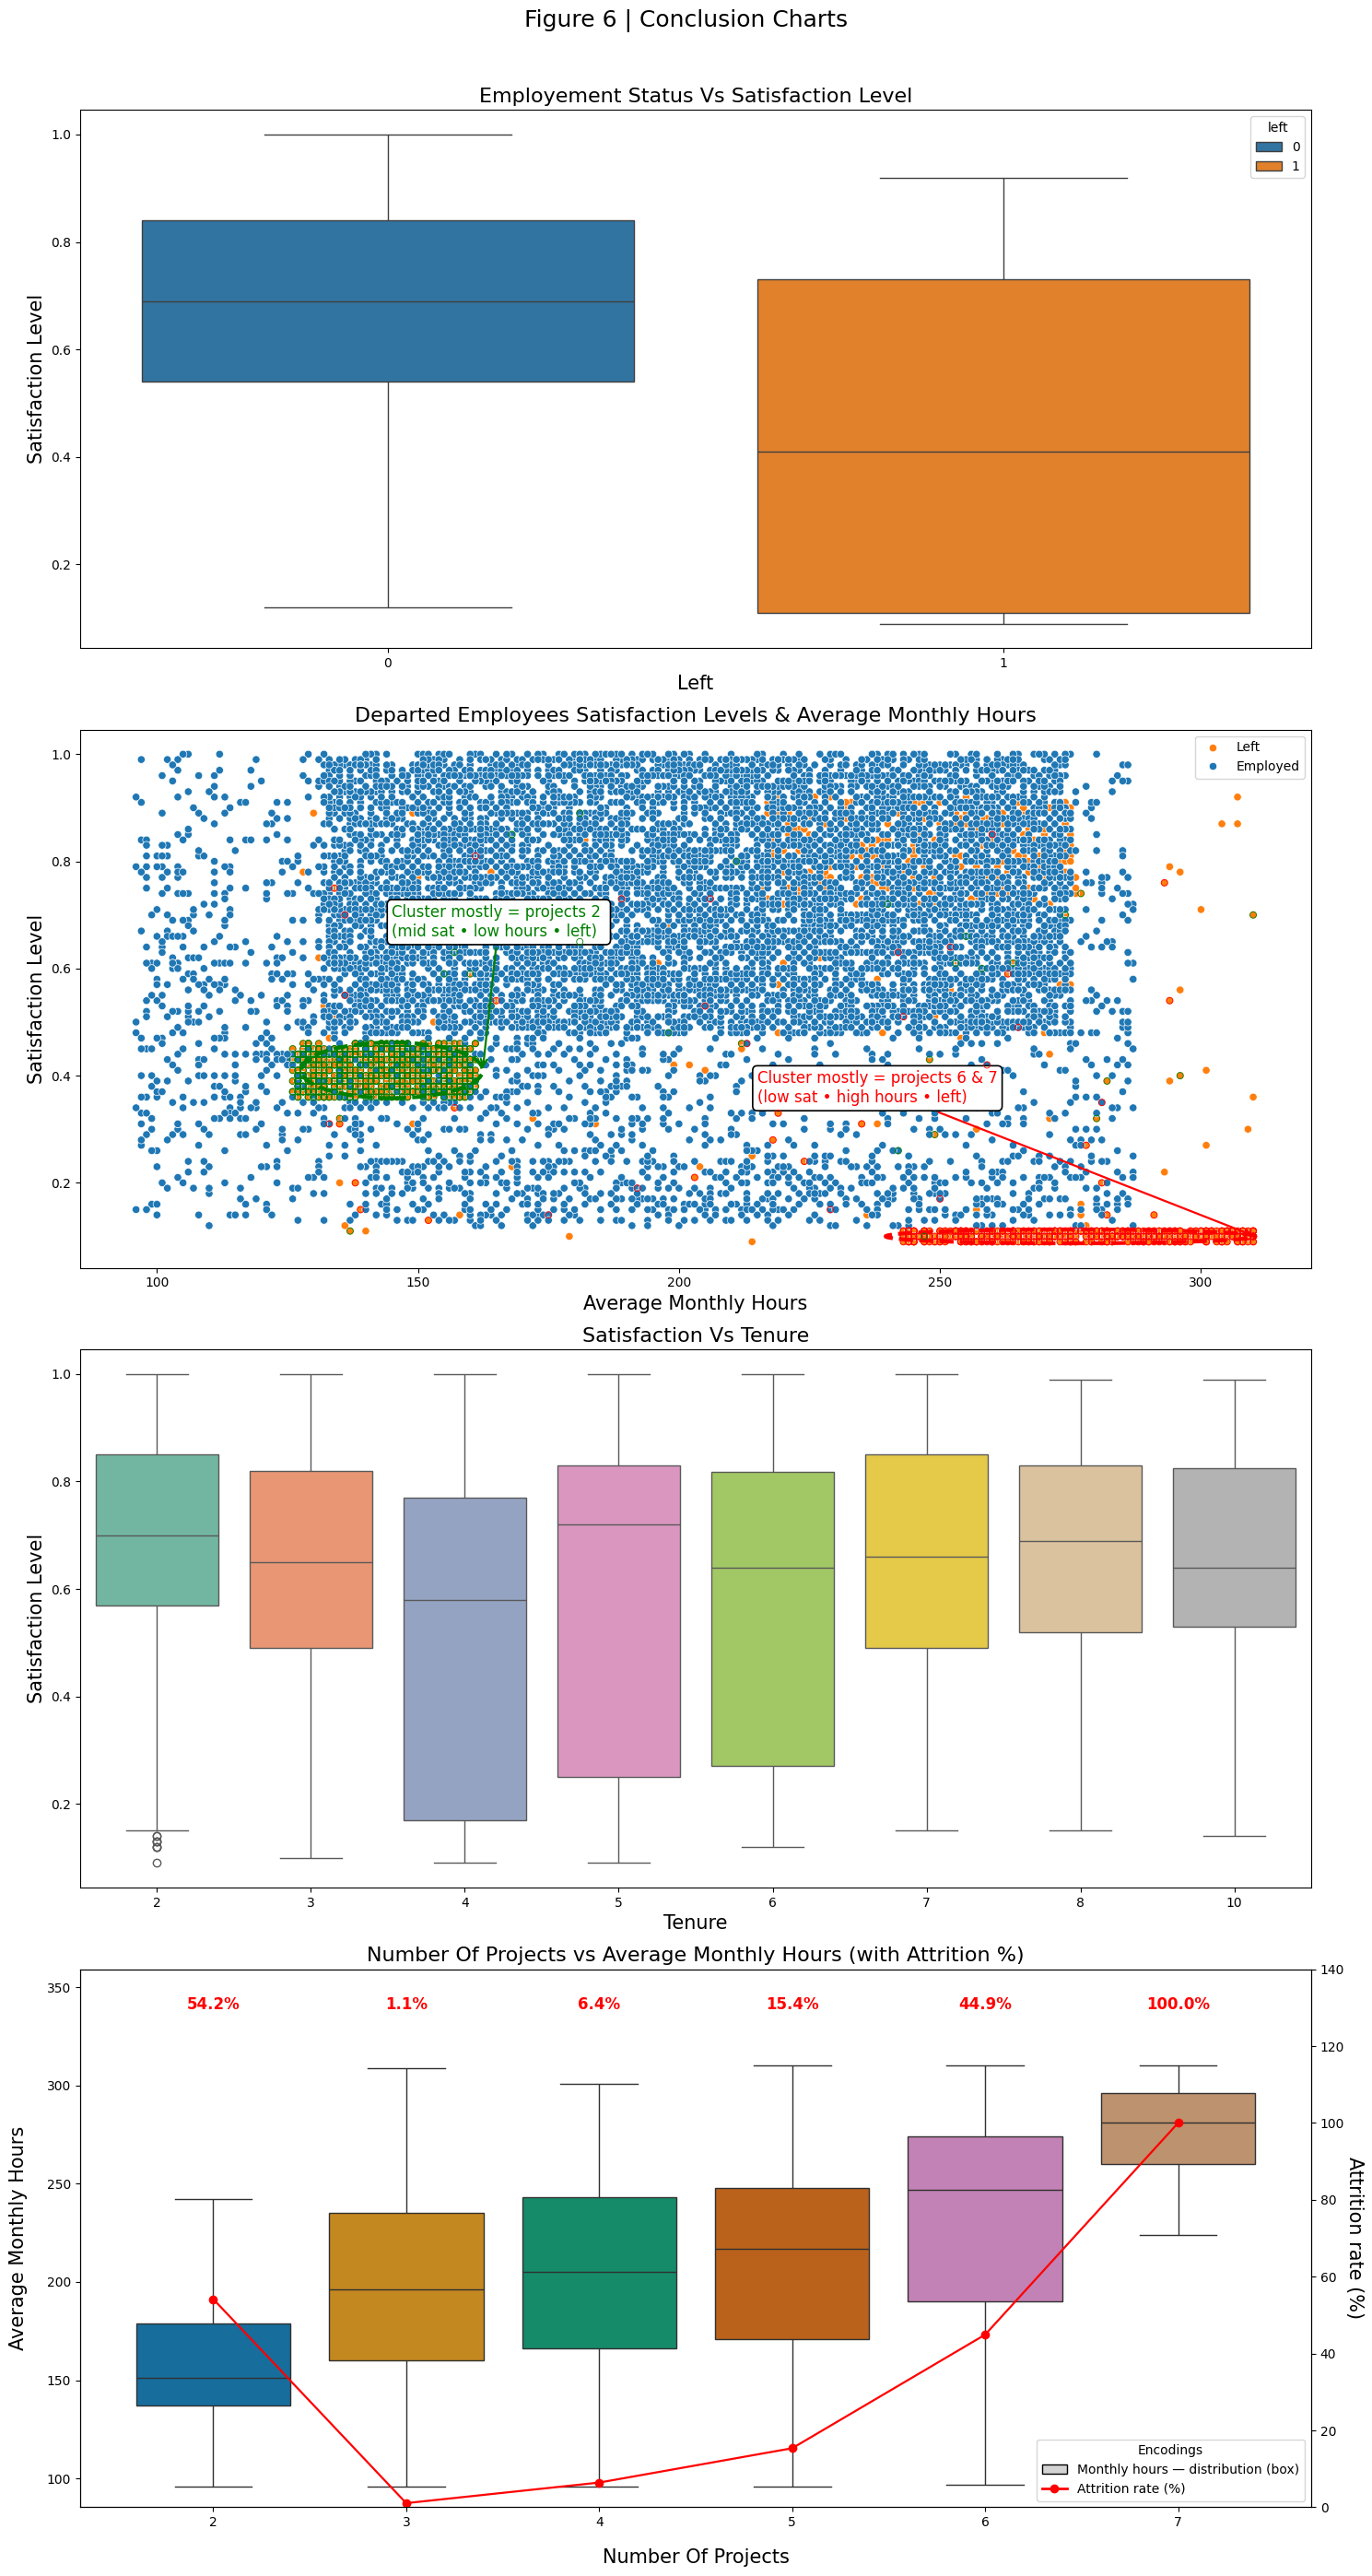

In [157]:
fig_6, ax = plt.subplots(4,1,figsize=(15,30))
fig_6.suptitle(
    "Figure 6 | Conclusion Charts",
    fontsize=18)

# First Plot | Satisfaction Vs Left
sns.boxplot(
    data = df_cleaned,
    x = 'left',
    y = 'satisfaction_level',
    ax = ax[0],
    hue='left'
)
ax[0].set_title('Employement Status Vs Satisfaction Level',fontsize=16)
ax[0].set_ylabel('Satisfaction Level',fontsize=15)
ax[0].set_xlabel('Left',fontsize=15)

# Second Plot | Satisfaction Vs Average Monthly Hours
sns.scatterplot(
    data = df_cleaned,
    x = 'average_monthly_hours',
    y = 'satisfaction_level',
    ax = ax[1],
    hue = 'left'
)
ax[1].set_title('Departed Employees Satisfaction Levels & Average Monthly Hours',fontsize=16)
ax[1].set_ylabel('Satisfaction Level',fontsize=15)
ax[1].set_xlabel('Average Monthly Hours',fontsize=15)
ax[1].legend(labels=['Left', 'Employed'])

#-- Annotate Clusters --#

# 1 ) Number Of Projects == 6 or 7
#Subset the cluster you want to label
blob_1 = df_cleaned[
    (df_cleaned['left'] == 1) &
    (df_cleaned['number_of_projects'].isin([6, 7]))
]

# Center + size of an ellipse using robust spread (10–90% range)
cx = blob_1['average_monthly_hours'].median()
cy = blob_1['satisfaction_level'].median()
w  = blob_1['average_monthly_hours'].quantile(0.90) - blob_1['average_monthly_hours'].quantile(0.10)
h  = blob_1['satisfaction_level'].quantile(0.90) - blob_1['satisfaction_level'].quantile(0.10)

# Draw an outline around the cluster
w *= 1.2        # Increase width outline
h *= 1.3        # Increase height outline
ell = Ellipse((cx, cy), width=w, height=h,
              facecolor='none', edgecolor='red',
              linestyle='--', linewidth=3, zorder=3)
ax[1].add_patch(ell)

# Add an arrowed annotation pointing to the ellipse
ax[1].annotate(
    "Cluster mostly = projects 6 & 7\n(low sat • high hours • left)",
    xy=(cx + w/2, cy), xycoords='data',            # arrow tip near ellipse edge
    xytext=(cx - 60, cy + 0.25), textcoords='data',  # where the text box sits
    arrowprops=dict(arrowstyle="->", color='red', lw=1.6),
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1.2),
    fontsize=12, color='red'
)

# lightly re-plot the target points so they pop
ax[1].scatter(blob_1['average_monthly_hours'], blob_1['satisfaction_level'],
              facecolors='none', edgecolors='red', linewidths=0.6, s=25, zorder=3)



# 2 ) Number Of Projects == 2

# Subset the cluster you want to label
blob_2 = df_cleaned[
    (df_cleaned['left'] == 1) &
    (df_cleaned['number_of_projects'].isin([2]))
]

# Center + size of an ellipse using robust spread (10–90% range)
cx = blob_2['average_monthly_hours'].median()
cy = blob_2['satisfaction_level'].median()
w  = blob_2['average_monthly_hours'].quantile(0.90) - blob_2['average_monthly_hours'].quantile(0.10)
h  = blob_2['satisfaction_level'].quantile(0.90) - blob_2['satisfaction_level'].quantile(0.10)

# Draw an outline around the cluster
w *= 1.2        # Increase width outline
h *= 1.3        # Increase height outline
ell = Ellipse((cx, cy), width=w, height=h,
              facecolor='none', edgecolor='green',
              linestyle='--', linewidth=3, zorder=3)
ax[1].add_patch(ell)

# Add an arrowed annotation pointing to the ellipse
ax[1].annotate(
    "Cluster mostly = projects 2 \n(mid sat • low hours • left)",
    xy=(cx + w/2, cy), xycoords='data',               # arrow tip near ellipse edge
    xytext=(cx - 0, cy + 0.25), textcoords='data',  # where the text box sits
    arrowprops=dict(arrowstyle="->", color='green', lw=1.6),
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1.2),
    fontsize=12, color='green'
)

# lightly re-plot the target points so they pop
ax[1].scatter(blob_2['average_monthly_hours'], blob_2['satisfaction_level'],
              facecolors='none', edgecolors='green', linewidths=0.6, s=25, zorder=3)





# Third Plot | Satisfaction Vs Tenure
sns.boxplot(
    data=df_cleaned,
    x='tenure',
    y='satisfaction_level',
    ax=ax[2],
    hue='tenure',
    palette='Set2',
    legend=False
    
)
ax[2].set_title('Satisfaction Vs Tenure',fontsize=16)
ax[2].set_ylabel('Satisfaction Level',fontsize=15)
ax[2].set_xlabel('Tenure',fontsize=15)



# Fourth Plot | Number of Projects vs Satifaction + Attrition rate

# Consistent variable orders 
order = sorted(df_cleaned['number_of_projects'].unique())
df_cleaned['number_of_projects'] = pd.Categorical(
    df_cleaned['number_of_projects'], categories=order, ordered=True
)

# Attrition rate (%) per project
attr_rate = (
    df_cleaned
      .groupby('number_of_projects',observed=False)['left']   # 1 if left, 0 if stayed
      .mean()
      .mul(100)
      .reindex(order)
)

# Boxplot
ax4 = ax[3]             # single axis to abide np.array requirement
sns.boxplot(
    data=df_cleaned,
    x='number_of_projects',
    y='average_monthly_hours',
    order=order,
    ax=ax4,
    hue='number_of_projects',
    palette='colorblind',
    showfliers=False,   
)
ax4.set_title('Number Of Projects vs Average Monthly Hours (with Attrition %)', fontsize=16)
ax4.set_ylabel('Average Monthly Hours', labelpad=15,fontsize=15)
ax4.set_xlabel('Number Of Projects', labelpad=15,fontsize=15)

# Increase axis sizes
ymin, ymax = ax4.get_ylim()
ax4.set_ylim(ymin, ymax * 1.12)

# Add % labels centered above each box
for i, (p, rate) in enumerate(attr_rate.items()):
    ax4.text(
        i, ymax * 1.05, f'{rate:.1f}%',
        ha='center', va='bottom', fontsize=12, fontweight='bold',color='red'
    )

# Overlay a secondary y-axis with the attrition rate as a line
ax4b = ax4.twinx()
ax4b.plot(ax4.get_xticks(), attr_rate.values, marker='o', linewidth=1.6,color='red')
ax4b.set_ylim(0, max(attr_rate.values) * 1.4)
ax4b.set_ylabel('Attrition rate (%)', rotation=270, labelpad=15,fontsize=15)
ax4b.grid(False)      # keep the boxplot grid only

# Legend
box_proxy  = Patch(facecolor='lightgray', edgecolor='k',
                   label='Monthly hours — distribution (box)')
line_proxy = Line2D([0],[0], color='red', marker='o', lw=2,
                    label='Attrition rate (%)')

ax4.legend(
    handles=[box_proxy, line_proxy],
    loc='lower right', frameon=True, title='Encodings'
)





# Save & Export
# Save Fig
save_path = os.path.join(OUTPUTS,'Figure_6_Conclusion_Charts.png')
plt.savefig(save_path)




# Display & Layout
fig_6.subplots_adjust(left=0.10, right=0.98, bottom=0.08, top=0.92, hspace=0.38)
plt.tight_layout(rect=[0, 0.05, 1, 0.97])

Further classification models identified the strong influence of features **Satisfaction Levels**, **Average Monthly Hours** and **Number of Projects** as key predictors when identifying if an employee had **left** the organisation. This further corroborates our conclusive theory. 

Additional insights from the XGBoost model showcase **Previous Satisfaction Level** and **Tenure** as top key predictors. For organisational decision making, observations in employee satisfaction in sequential years of employment may provide opportunity to identify attrition.

Final collection of statistics per Number Of Projects employees are assigned to support the previous observations,the assocaition between features **Satisfaction Levels**, **Average Monthly Hours**, **Tenure** and **Number of Projects** towards an employees **Leaving** the organsiation, with a **100% attrition rate** for employees on **7 different projects, the highest average monthly hours, highest mean tenure and lowest satisfaction levels.**

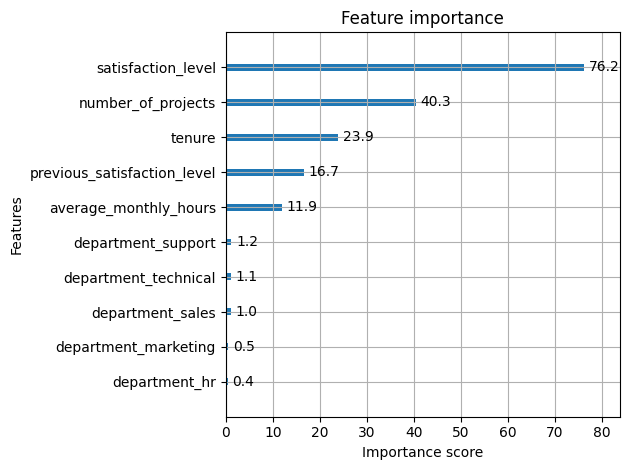

In [98]:
XGB_Feature_Importance

In [99]:
# Project Descriptive Statistics

# Project Dataframe
project_stats = (
    df_cleaned
      .groupby('number_of_projects')
      .agg(
          Employees_Assigned=('number_of_projects', 'size'),
          Average_Monthly_Hours=('average_monthly_hours', 'mean'),
          Median_Monthly_Hours=('average_monthly_hours', 'median'),
          Mean_Tenure=('tenure','mean'),
          Median_Satisfaction_Level=('satisfaction_level','median')
      )
      .reset_index()

)

# Dataframe Rounding
project_stats['Average_Monthly_Hours'] = project_stats['Average_Monthly_Hours'].round(1)
project_stats['Median_Monthly_Hours']  = project_stats['Median_Monthly_Hours'].round(1)
project_stats['Mean_Tenure'] = project_stats['Mean_Tenure'].round(1)
project_stats['Median_Satisfaction_Level'] = project_stats['Median_Satisfaction_Level'].round(1)

# Project Attrition Rate
left_sums =pd.DataFrame(emps_left.groupby('number_of_projects')['left'].sum())
left_sums = left_sums.reset_index()
project_stats = (project_stats
                 .merge(left_sums, on='number_of_projects', how='left')
                 .fillna({'left': 0}))
project_stats['left'] = project_stats['left'].astype(int)
project_stats['Attrition_Rate'] = round(project_stats['left']/project_stats['Employees_Assigned']*100,1)

# Dataframe Sorting
project_stats.sort_values('Average_Monthly_Hours', ascending=False)
project_stats = project_stats.rename(columns={'number_of_projects':'Number_of_Projects','left':'Left'})

# Dataframe Column Organisation
cols_to_move = ['Number_of_Projects','Employees_Assigned','Left', 'Attrition_Rate']
remaining_cols = [col for col in project_stats.columns if col not in cols_to_move]

new_order = cols_to_move + remaining_cols
project_stats = project_stats[new_order]

# Export
project_stats.to_csv(str(OUTPUTS) + '/project_statistics.csv', index=False)

# Style
project_stats_styled =(project_stats.style
  .format({'Attrition_Rate':'{:.1f}%', 'Average_Monthly_Hours':'{:.1f}',
           'Median_Monthly_Hours':'{:.1f}', 'Mean_Tenure':'{:.1f}',
           'Median_Satisfaction_Level':'{:.1f}'})
  .bar(subset=['Attrition_Rate'], align='mid')
  .background_gradient(subset=['Average_Monthly_Hours'], cmap='Oranges')
  )

# Display
project_stats_styled

,Number_of_Projects,Employees_Assigned,Left,Attrition_Rate,Average_Monthly_Hours,Median_Monthly_Hours,Mean_Tenure,Median_Satisfaction_Level
0,2,1582,857,54.2%,164.8,151.0,3.2,0.4
1,3,3520,38,1.1%,197.3,196.0,3.1,0.7
2,4,3685,237,6.4%,203.9,205.0,3.3,0.7
3,5,2233,343,15.4%,209.1,217.0,3.6,0.7
4,6,826,371,44.9%,230.4,247.0,4.2,0.2
5,7,145,145,100.0%,275.6,281.0,4.1,0.1


In [100]:
# Export Project_Statistics Dataframe

# Export
dfi.export(project_stats,"Project_Statistics.png",table_conversion="matplotlib")

# Define the source
file_name = "Project_Statistics.png"

# Construct the full paths for the source file and destination
source_file_path = os.path.join(nb_directory, file_name)
destination_file_path = os.path.join(output_directory, file_name)

try:
    # Move the file
    shutil.move(source_file_path, destination_file_path)
    print(f"File '{file_name}' moved successfully from '{nb_directory}' to '{output_directory}'.")
except FileNotFoundError:
    print(f"Error: Source file '{source_file_path}' not found.")
except PermissionError:
    print(f"Error: Permission denied to move '{file_name}'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


File 'Project_Statistics.png' moved successfully from '/Users/mitchellpalmer/Projects/Salifort-Motors/notebooks' to '/Users/mitchellpalmer/Projects/Salifort-Motors/Outputs'.


#### Recommendations

Reflecting upon the above visualisations and numbers presented below in **Project Statistics**, this investigation recommends addressing the key variables that are supported by analysis to associate with **employee departure.**

- Rebalance Project Assignment
    - Employees with the highest levels of mean Satisfaction Levels are assigned to 4 or 5 projects. **Restrict employees to a maximum of 5 projects.**
- Restrict Employee Hours
    - Restrict **Average Monthly Hours** for employees to the ranges presented by most satisfied employees, **a maximum of 230 hours**.


#### Next Steps

Further steps to improve this investigation may include

- Sourcing information on **Type of Employee Departure**. 
    - Fired
    - Redundant
    - Resignation
    
The data shows significant quantities of employees departed with medium and high satisfaction levels, primarily from collection of employees assigned to 2 project and in the departments of sales and human resources. 

Distinguishing between how employees left Salifort may assist in analyzing where employee resources may be reassigned to compensate over-worked employees working on 6 or 7 projects.

- Assess Employee Previous Satisfaction Levels
The XGBoost model identifies **Previous Satisfaction Levels** as a key indicator towards predicting an employees eventual departure. Analysis of threshold upon satisficlations could provide potential risk management of employee attrition to monitor work environment and maintain sufficient satisfaction levels.
 


